In this notebook, we try to segment customers into different categories based on their purchasing behaviour. Conclusions from customer segmentation can give us bussiness insights and strategies.

##### Topics explored in the notebook

1) Importing required libraries and data<br>
2) Simple visualization of the data and few  samples<br>
3) Visualisation via pca and pairplot<br>
4) Checking for dependent variables<br>
5) Outlier detection and handling<br>
6) Cluster analysis: Are there clusters, how many?<br>
7) Clustering and interpretation<br>
8) Deriving conclusions

### 1) Importing required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [3]:
import itertools

In [9]:
data = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')

In [11]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

### 2) Simple visualization

In [14]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

1. customer is the unique customer id. <br>
2. order is the unique order id. <br>
3. total_items is the number of products bought in the order. <br>
4. discount% is the amount of discount provided during the purchase, the negative values in discount stands for extra amount the customer paid to ulabox as delivery charge or any other mode of fee. <br>
5. weekday is the day of the week in which the order was placed.<br>
6. hour is the time in which the order is placed. <br>
7. Food% is the amount of money spent on non fresh food in the purchase, it may include grocery products like sugar, coffee  powder, oats etc.<br>
8. Fresh% is the amount of money spent on fresh food like milk, fruits, vegetables etc.<br>
9. Drinks% is most probably the percentage of amount spent on alchohol like wine, vodka, scotch etc. There is a teeny tiny chance that these also include soft drinks.<br>
10. Home% is the percentage of money spent in home accessories.<br>
11. Beauty% is the percentage of amount spent in beauty products<br>
12. Health% is the percentage of amount spent in medicine or health products like protein supplement, carb supplement etc.<br>
13. Baby% is the percentage spent in baby products.<br>
14. Pets% is the percentage spent in pet products like pedigree.

In [17]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
5060       1696   5060           26      -0.34        4    11  24.60    0.00   
17998      6038  17998           22      -0.33        2    23   4.74    0.00   
13526      4557  13526           77      -0.19        4    12  78.57    0.00   
20654      6889  20654           44      -0.04        4     0  33.87    0.00   
8247       2875   8247           35      -0.03        6     9  34.31   32.01   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03     0.00     0.00   0.00    0.0  
4554    100.00   0.00     0.00     0.00   0.00    0.0  
7185    100.00   0.00     0.00     0.00   0.00    0.0  
768      71.03   0.00     0.00     0.00   0.00    0.0  
16098   100.00   0.00     0.00     0.00   0.00    0.0  
...        ...    ...      ...      ...    ...    ...  
5060     34.11  32.87     8.42     0.00   0.00    0.0  
17998    15.49   0.00     0.00     0.00  79.77    0.0  
13526    14.69   6.74     0.00     0.00   0.00    0.0  
20654    14.96  17.42    15.40    18.36   0.00    0.0  
8247      5.33   8.90     8.66     6.45   4.34    0.0  

[126 rows x 14 columns]

-> drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

#### Selecting samples

In [21]:
indices = [56,2459,908,23632,1803,218,592,349]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

-> 56 order seems to depend on ulabox for grocery, fresh food and drinks. <br>
-> 2459 and 908 order seems to depend on ulabox for everything, probably most valuable customers. <br>
-> 23632 order seems to buy a lot of drinks from ulabox in spite of the negative discount, which implies extra charges.<br>
-> 1803 buys a lot of pet products, the order must be by a pet lover. <br>
-> 218 buys a lot of home decoratory accessories. <br>
-> 592 must be a woman, who would like her beauty products, to be delivered by ulabox at her door.<br>
-> 349 seems to be parents, who newly had a baby.

There may not be any relevant information in the hour in which the order was placed, but the weekday in which the order was placed may reveal some information about weekend buyers. Hece let's keep it.

Let's remove customer, order and hour features from the data

In [26]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

### 3) Visualization via pca and pairplot

Let's try and do pca of the features and see the explained variance and plots

In [30]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

This function takes the pca object and data frame as argurments and plots the explained variance of every feature in each principal component.

In [35]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

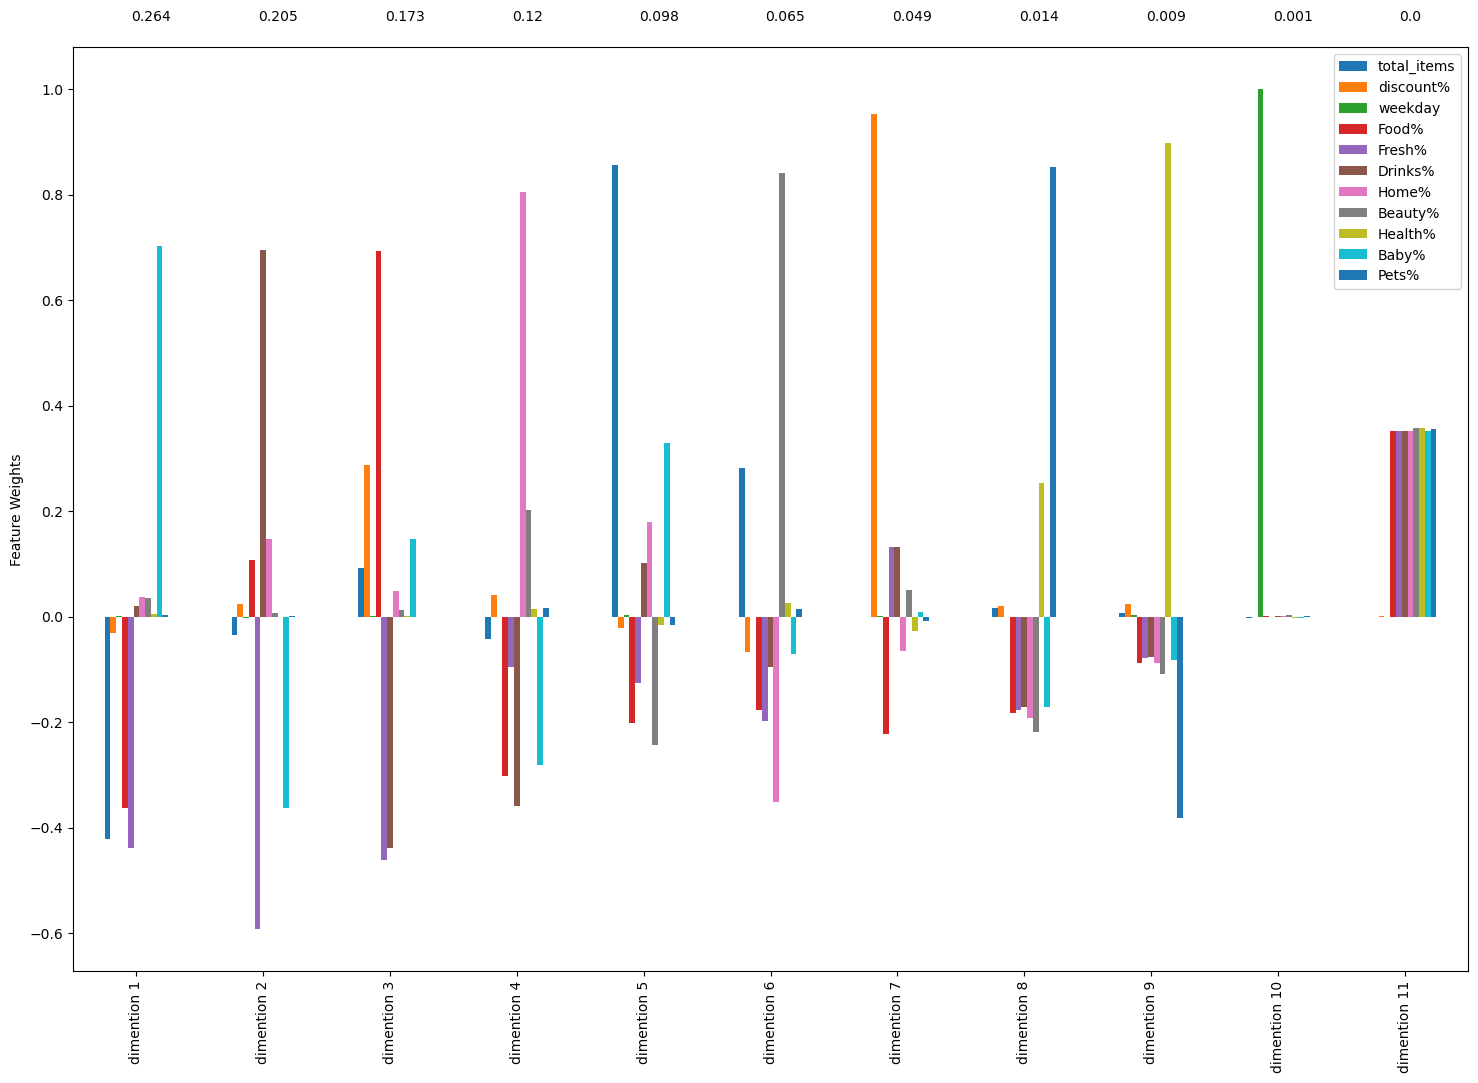

In [37]:
pca_results(pca, df)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

In [40]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

In [42]:
pca_2d_plot(pca, df)

TypeError: lmplot() got an unexpected keyword argument 'size'

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

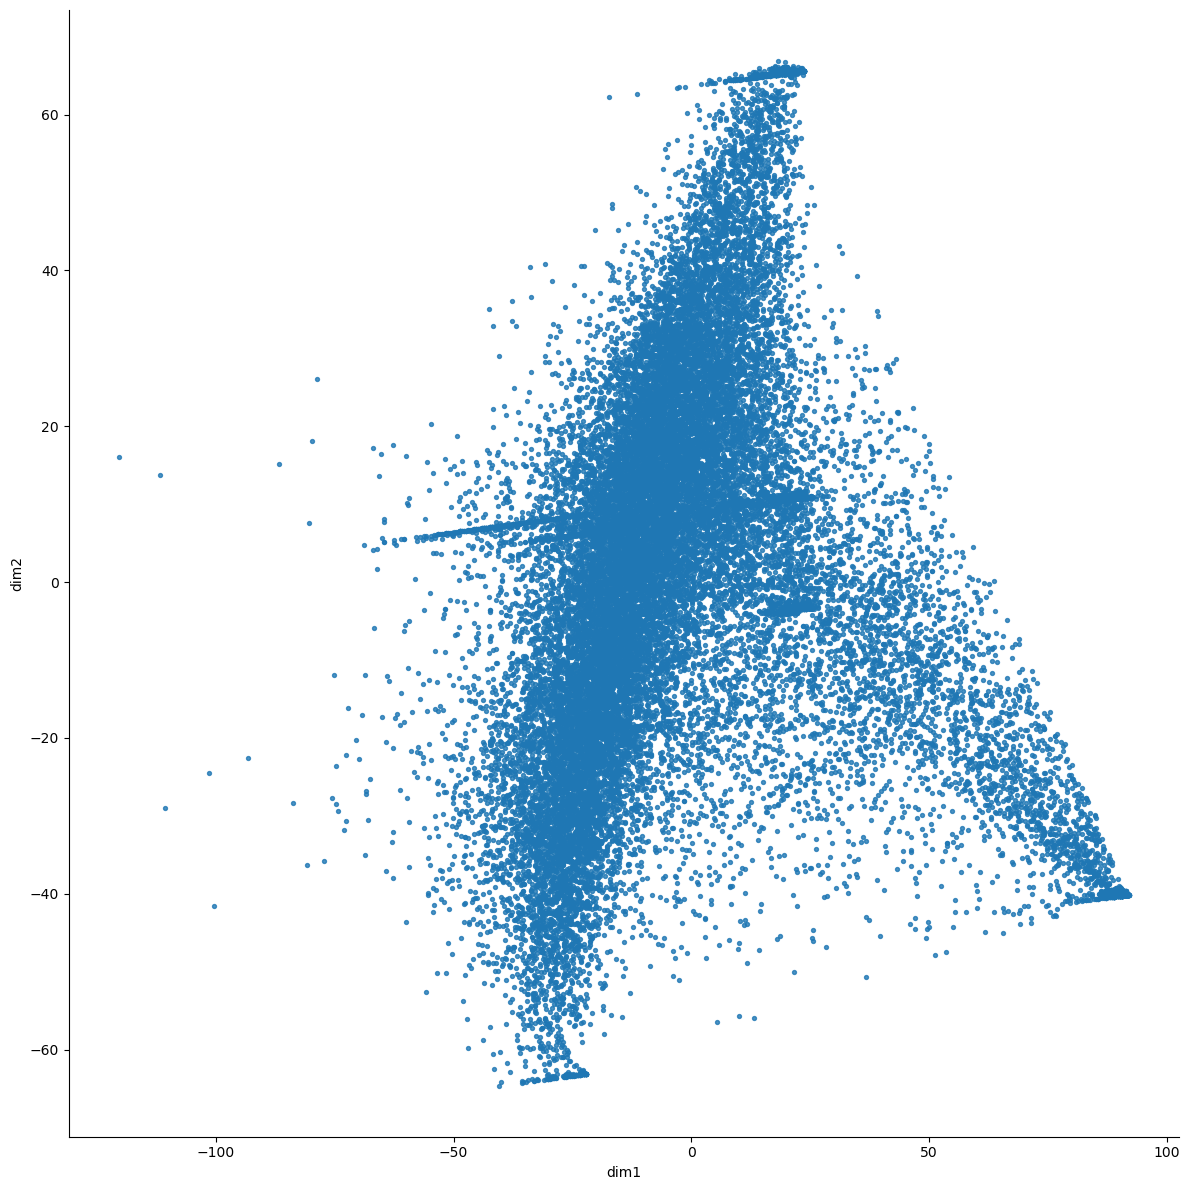

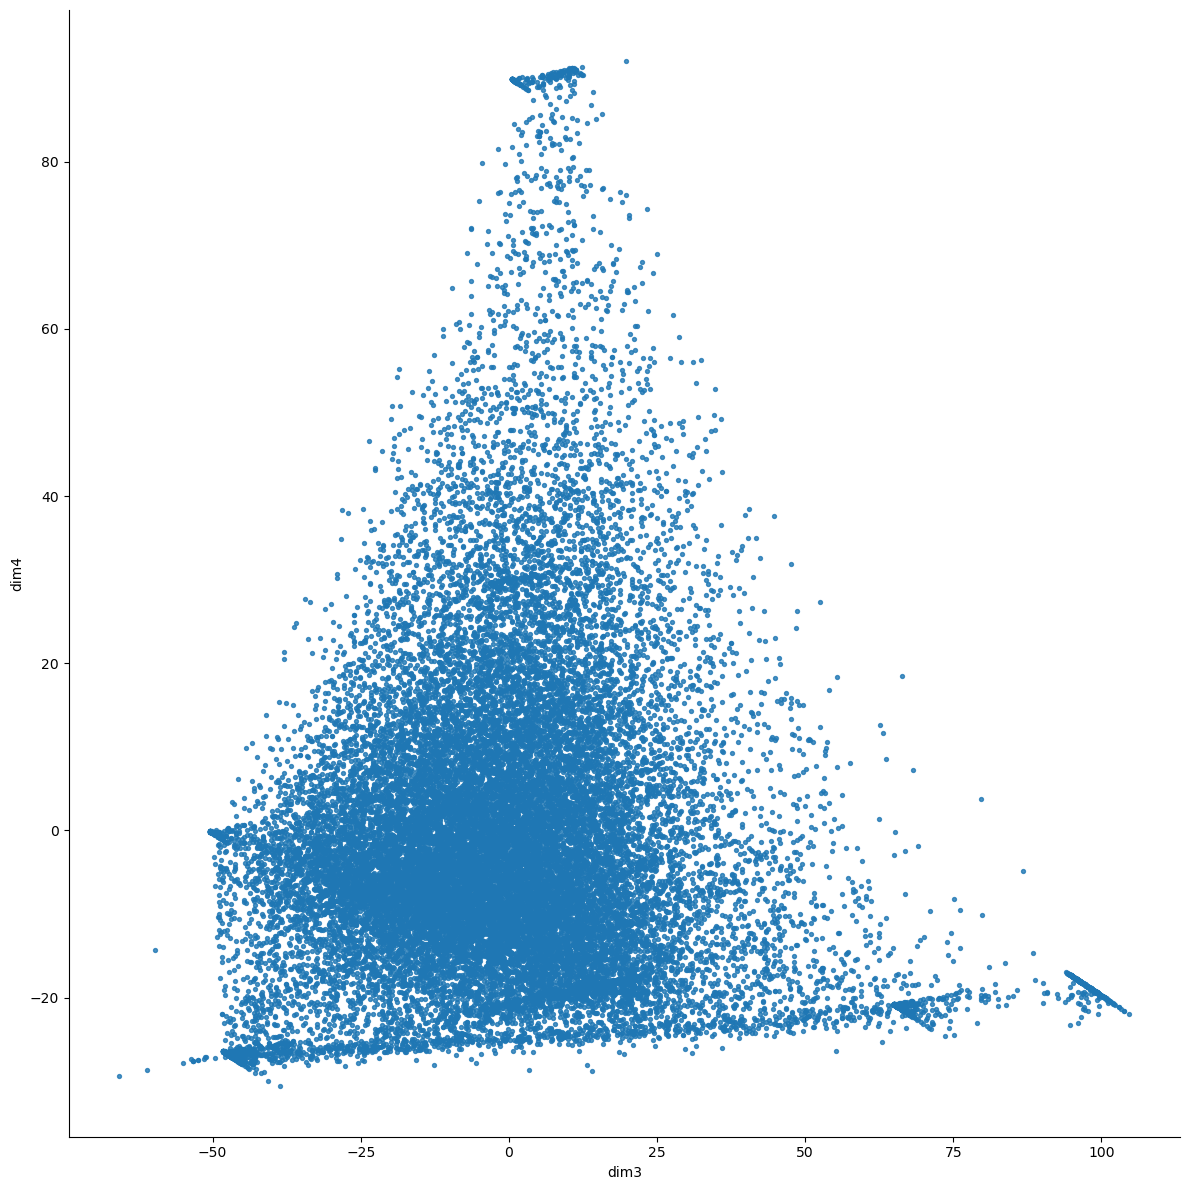

In [44]:
def pca_2d_plot(pca, df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    fig = plt.figure(figsize=(10, 10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim' + str(i) for i in range(1, 12)])

    sns.lmplot(x='dim1', y='dim2', data=data, height=12, fit_reg=False, scatter_kws={'s': 8})
    sns.lmplot(x='dim3', y='dim4', data=data, height=12, fit_reg=False, scatter_kws={'s': 8})

    plt.show()

# Call the function
pca_2d_plot(pca, df)


Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 2000x2000 with 0 Axes>

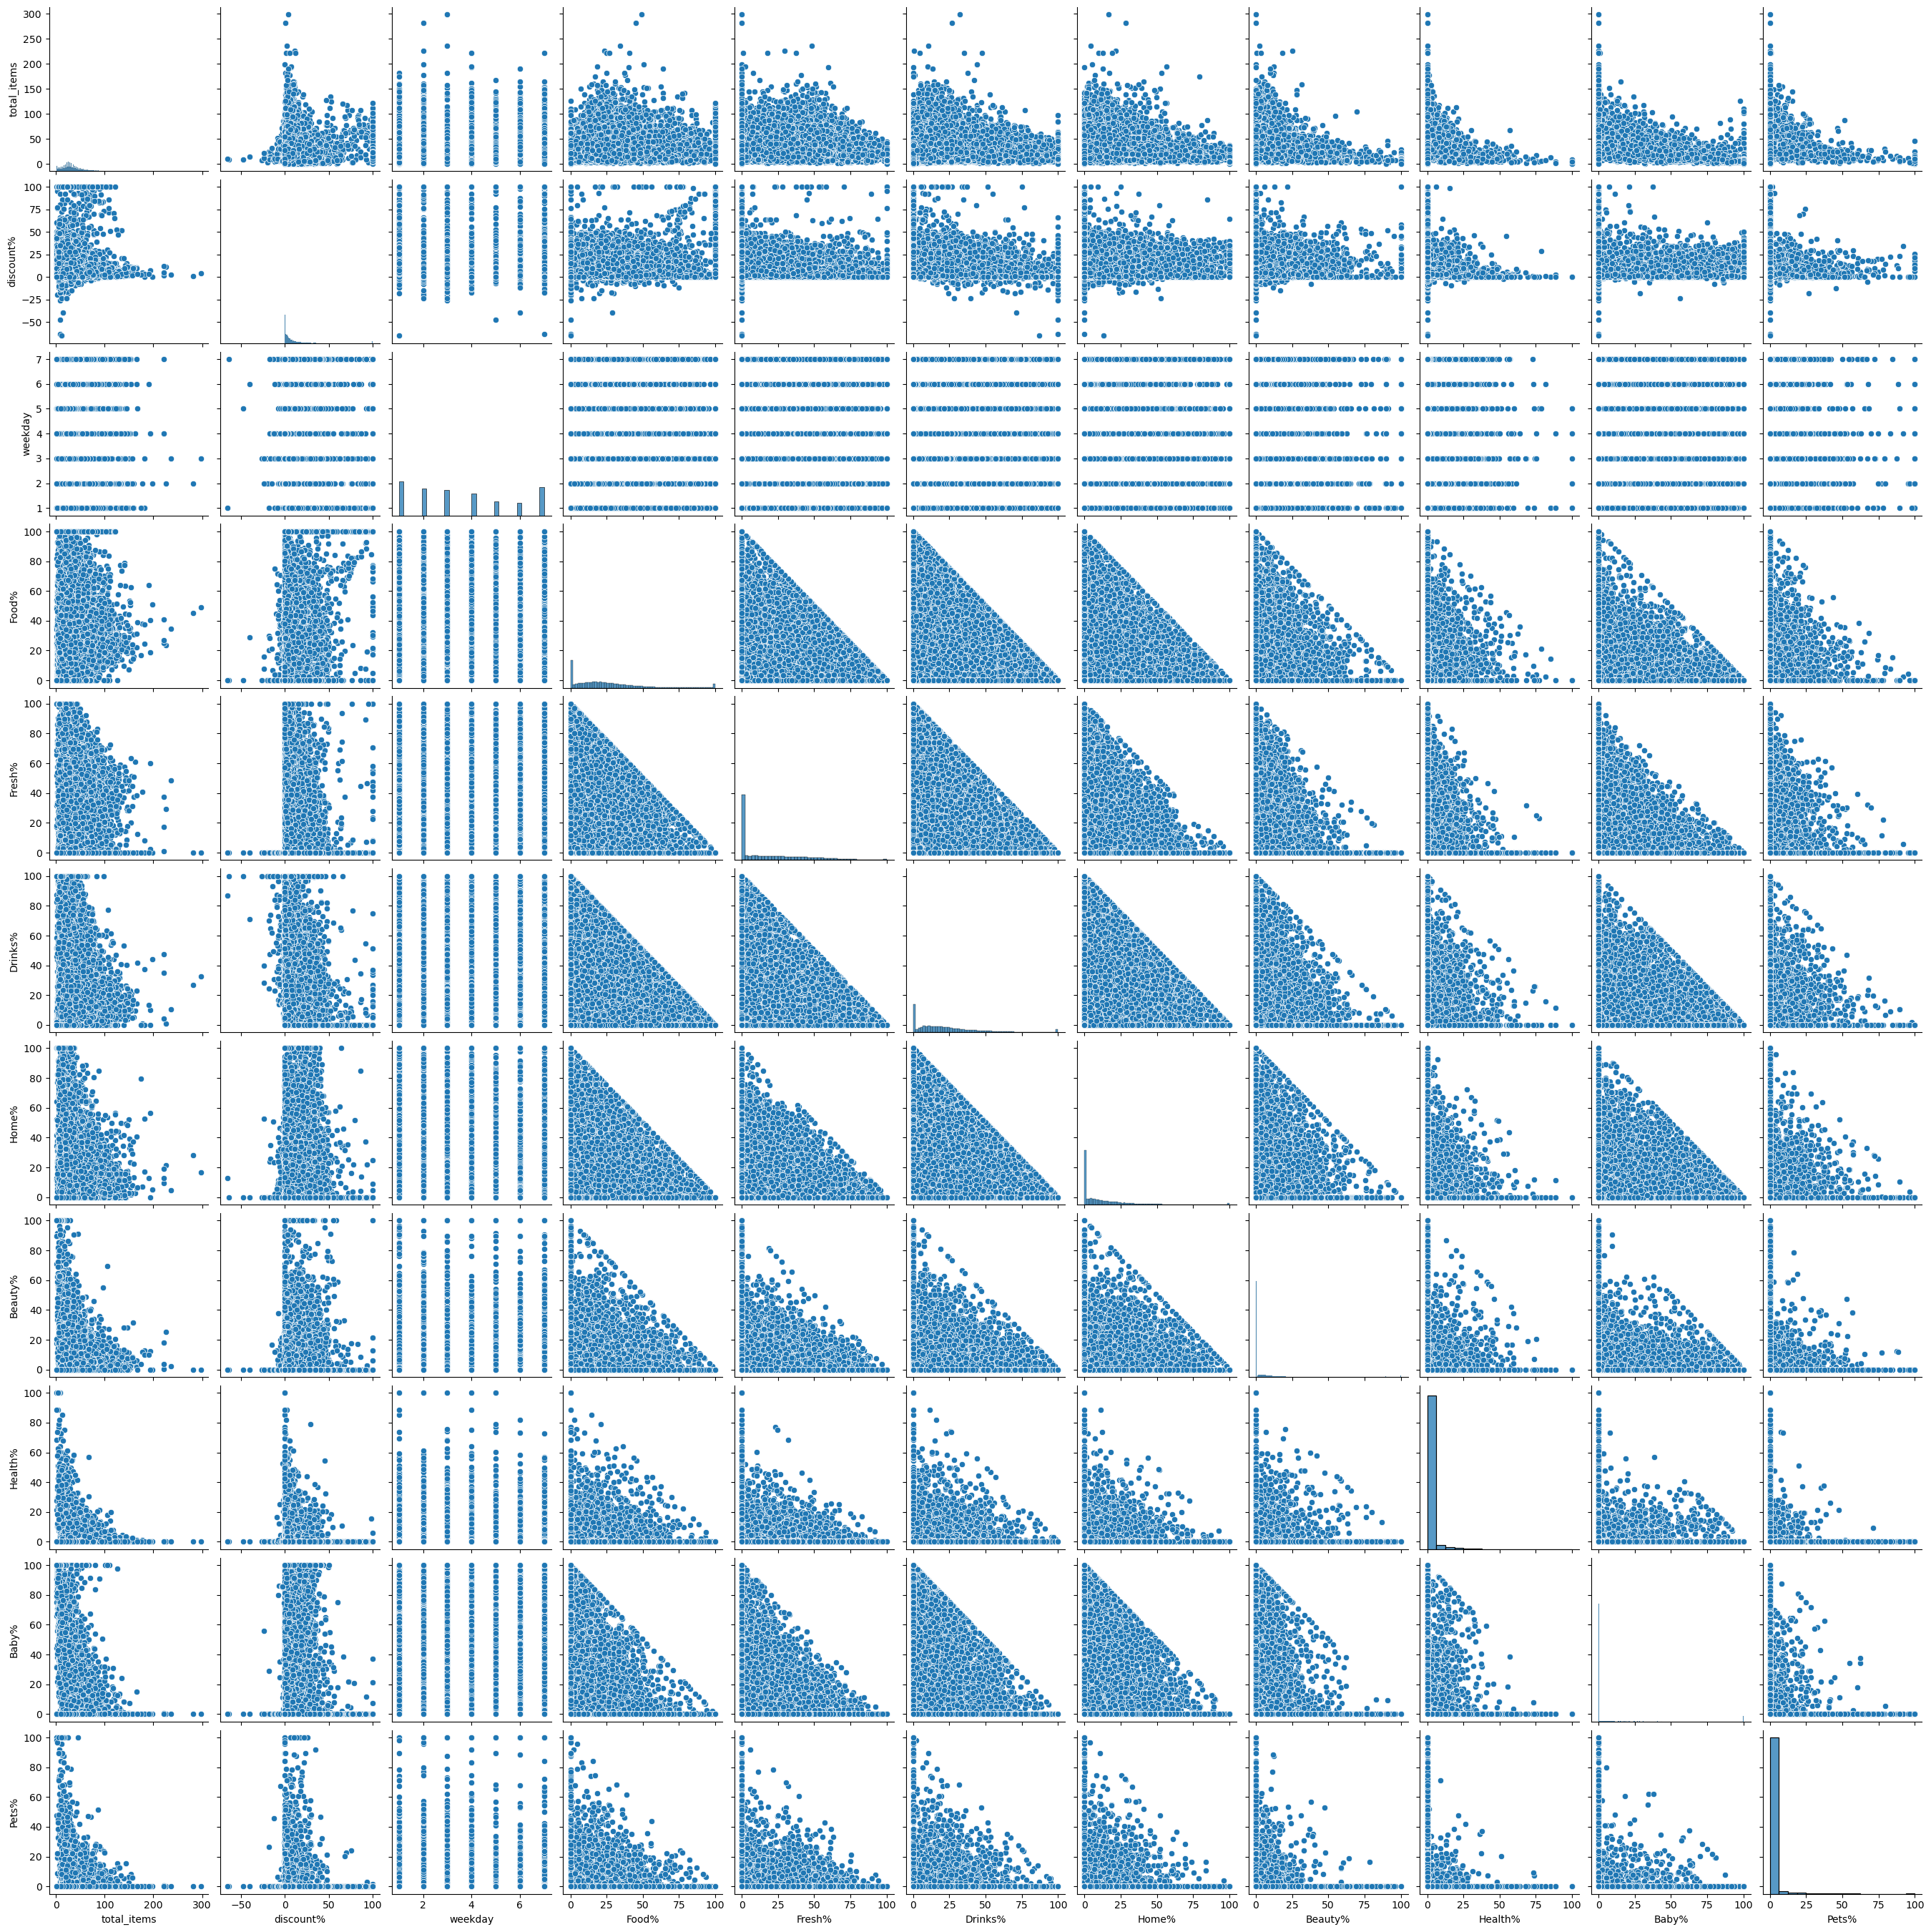

In [47]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

-> total_items is skewed, applying a log transformation will help the clustering.<br>
-> when discount% increases total_items icreases which makes sense, people will buy more on discount.<br>
-> below the 0 discount line only Drinks% has non zero percentage entries. Food%, Fresh% etc. have only zero percentage entries in negative discount area.<br>
-> it makes sense that the plots in the right bottom are bound by the line x+y = 100, as the data is actually in percentage x+y <= 100.<br>
-> the distribution plots are more and more skewed as we move towards the right bottom, as pet products, baby products and health products are brought by very less people.

### 4) Checking Dependant Variables

This function takes the data frame as arguement and prints R2 score of model trained with each feature as target. This is a good method to identify the dependant variables from our dataset. This can be used in other contexts as well.

In [51]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [52]:
dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.15848816407725974
Using discount% as dependent variable R2 score is :0.12779784963128127
Using weekday as dependent variable R2 score is :0.0019194529930831594
Using Food% as dependent variable R2 score is :0.9925724183188357
Using Fresh% as dependent variable R2 score is :0.9937312704627193
Using Drinks% as dependent variable R2 score is :0.9930865737794141
Using Home% as dependent variable R2 score is :0.9889948946530749
Using Beauty% as dependent variable R2 score is :0.9827301055344402
Using Health% as dependent variable R2 score is :0.888319659143346
Using Baby% as dependent variable R2 score is :0.994269557581205
Using Pets% as dependent variable R2 score is :0.9155244182728488


In [56]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

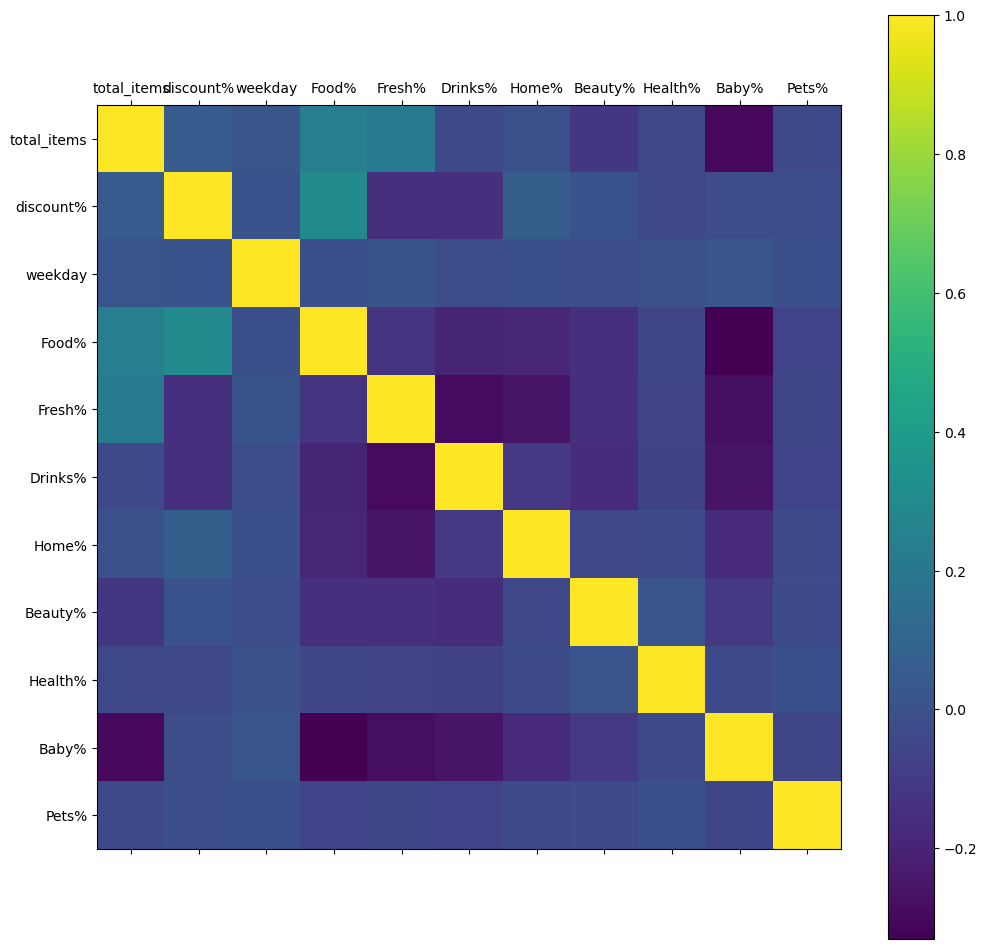

In [58]:
plot_corr_matrix(df)

-> The high R2 score in the case of Food%, Fresh% etc. does not mean they don't contain any information individually.<br>
-> The high R2 score is owing to this relationship Food% + Fresh% + .......+ Pets% = 100, the regression model has learned it.

### 5) Outlier detection

C:\Users\ashis\AppData\Local\Temp\ipykernel_7448\1483742675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


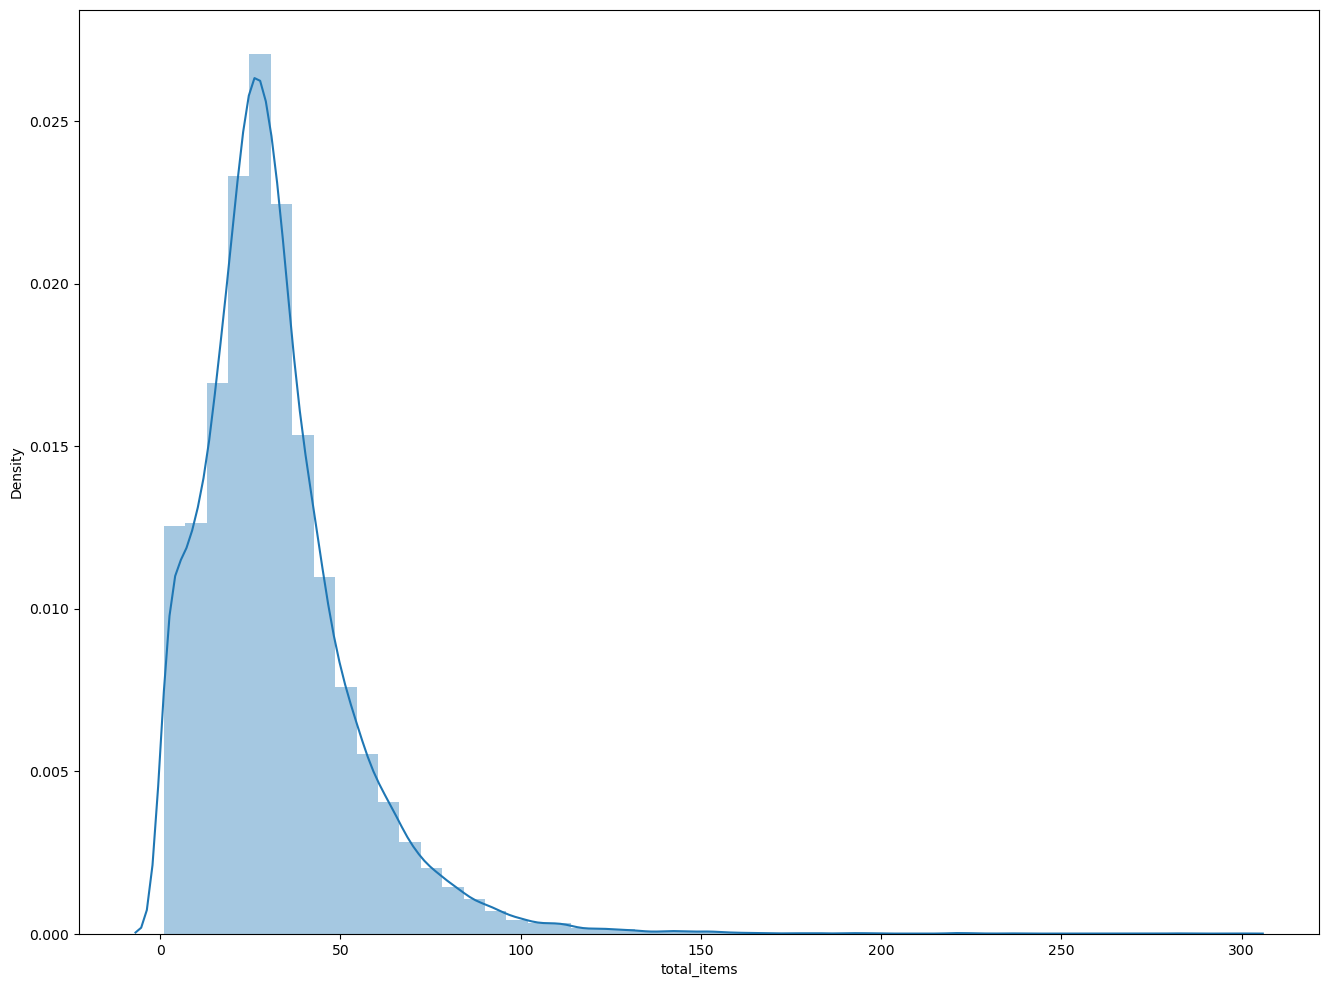

In [62]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

C:\Users\ashis\AppData\Local\Temp\ipykernel_7448\277247732.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


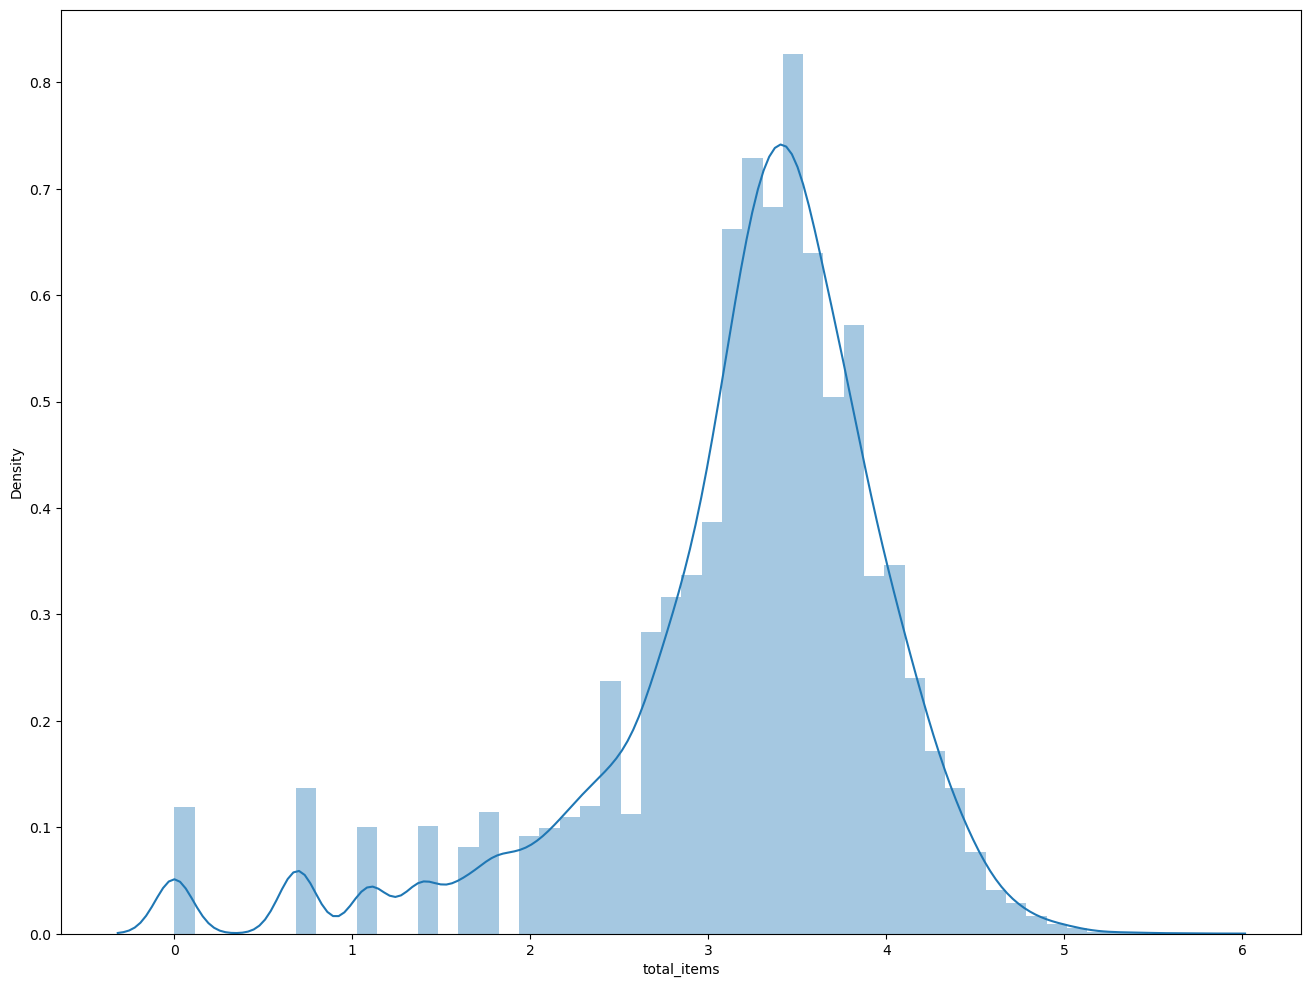

In [65]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

That's better

#### Turkey Outlier Detection

-> According to Turkey method a point is an outlier if it lies 1.5 times inter quartile distance to the right of third quartile or if it lies 1.5 times inter quartile distance to the left of first quartile.<br>
-> For more info refer: https://en.wikipedia.org/wiki/Outlier

This function takes df as an arguement and columns for which outlier detection has to be done, as an optional arguement. It returns a dictionary whose keys are column names and elements are indices of outlier points in the corresponding columns. It also prints the number of outliers in every column.

In [71]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [73]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


-> The outliers in Health% and Pets% are due to the fact that, lot people don't buy these products and the entries are mostly 0.<br>
-> The outliers in Food%, Fresh% etc. are due to the 0% and 100% entries which is a completely natural phenomenon in this scenerio.<br>
-> The outliers in discount% is also due to 0% and 100% entries.<br>
-> For these features let's acknoledge the fact that there are outliers and leave it there.<br>
-> Let's remove the outliers in total_items.

In [76]:
df.drop(outlier_indices['total_items'], inplace=True)

In [78]:
frame.drop(outlier_indices['total_items'], inplace=True)

## 6) Are there clusters in the data, how many clusters?

#### Elbow Method

-> The first method we are going to try is the elbow method.<br>
-> In this method we plot the sum of distances of all the data points to the correspoding cluster centeroids vs number of clusters, for a range of number of clusters.<br>
-> If there is a elbow in the plot the point at which elbow occured is the number of clusters present in the data.<br>
-> We are lucky if we see an elbow in the plot, but in most cases the plot will just be smooth revealing no information about the number of clusters.<br>

In [83]:
from sklearn.cluster import KMeans

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
X = scaler.fit_transform(df.values)

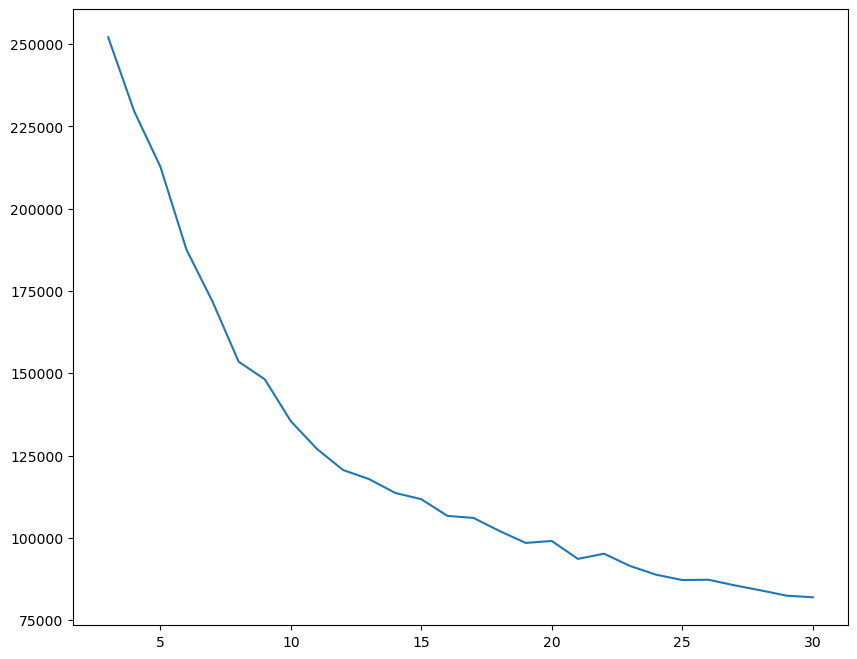

In [89]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

We got lucky! There is somewhere around 10 clusters in the data.

#### Hopkins Statistic

1) For every data point in the given data, calculate nearest neighbor distance and take it's sum. Let this be s.<br>
2) Generate random data in the same shape as the given data.<br>
3) For the random data calculate the nearest neighbor distance and take it's sum. Let this be r.<br>
4) Hopkins statistic score = s/(s+r).<br>
5) The intuition is, if the sample data has clusters in it, the nearest-neighbor-distance-sum of sample will be very much smaller than that of random data.<br>
6) A very small Hopkins statistic score means the data has very good clusters.<br>

In [94]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [96]:
hopkins_statistic(df)

------------7025------------
*************************
hopkins statistic :0.6197933695003451
*************************
hopkins statistic :0.618855270227583
*************************
hopkins statistic :0.6196020180479836
*************************
hopkins statistic :0.6201681865826779
*************************
hopkins statistic :0.6163958935890995
mean hopkins statistic :0.6189629475895378
hopkins statistic standard deviation :0.0013529207875434702
------------14050------------
*************************
hopkins statistic :0.6073650320776385
*************************
hopkins statistic :0.6091541491257532
*************************
hopkins statistic :0.609079542655208
*************************
hopkins statistic :0.6068899163772561
*************************
hopkins statistic :0.6071348760513188
mean hopkins statistic :0.6079247032574349
hopkins statistic standard deviation :0.0009851937789267628
------------21075------------
*************************
hopkins statistic :0.6016650050598236
***

We take different number of samples from the data and generate random data with different seeds and calculate hopkins statistic for each. The Hopkins statistic score is bad. Let's proceed with the analysis..

#### Kth Nearest Data point

-> Calculate the sum of distances of kth nearest neighbor of all the data points in the given data.<br>
-> Plot the value of the sum against k.<br>
-> If there is a sharp decline in the rate of change of y at some value of k, then there are clusters in the data.<br>

In [100]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

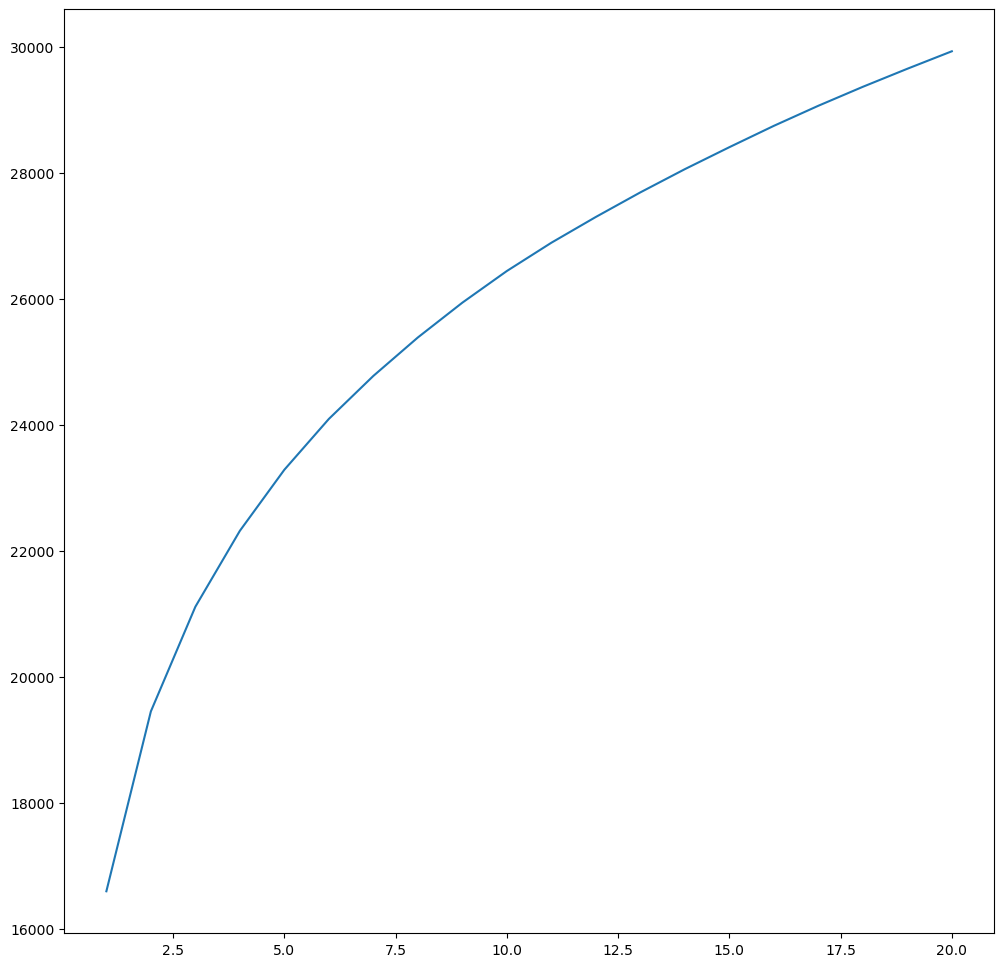

In [101]:
kth_nearest_data_point(df, 20)

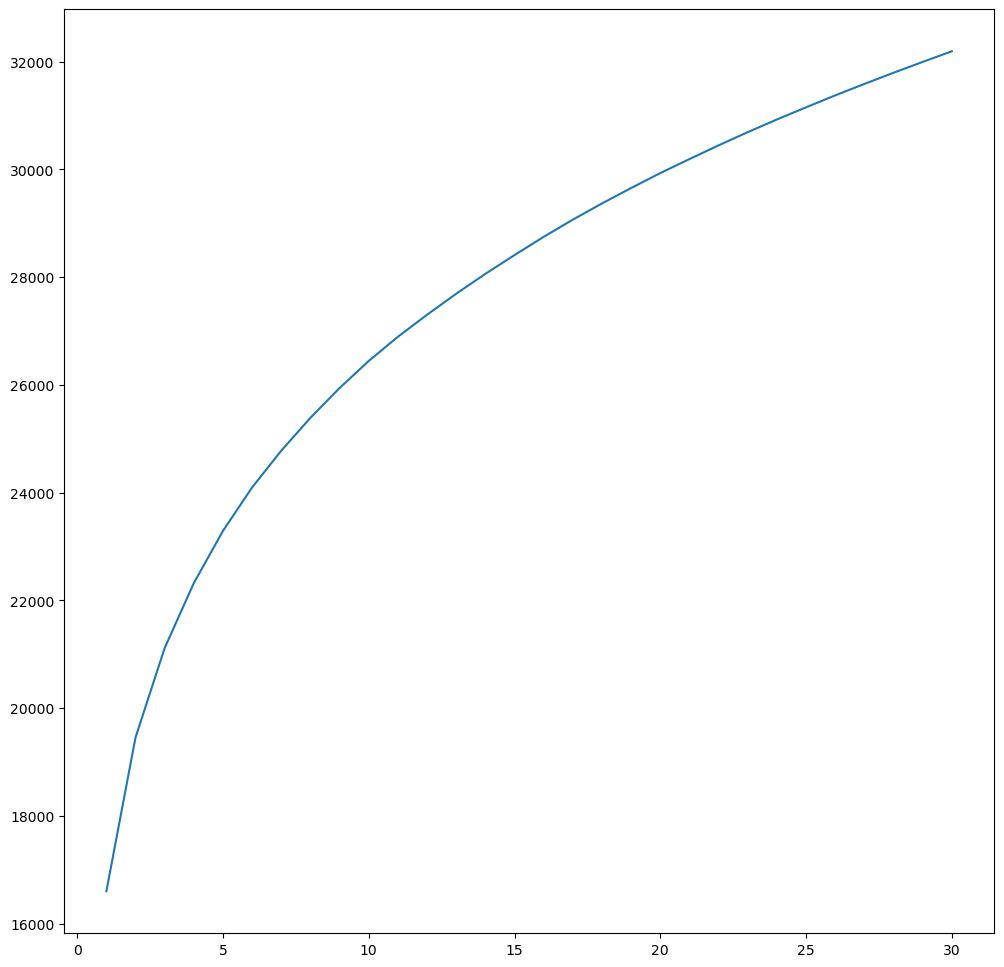

In [102]:
kth_nearest_data_point(df,30)

#### Silhoutte Score

-> a(i) is the sum of the sum of distances of the ith data point to the other data points in it's cluster.<br>
-> Calculate the sum of distance of ith data point to the points in every other cluster.<br>
-> b(i) is the sum of distances from ith data point to all points in a cluster, for which sum of distances is munimum.<br>
-> silhoutte score, s(i) = 1-a(i)/b(i)<br>
-> If a data point is more similar to it's own cluster and very much different from other clusters, then 
a(i)<<b(i), greater will be the silhoutte score.<br>
-> The silhoutte score we plot is the average of it over all the data points.<br>

In [105]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

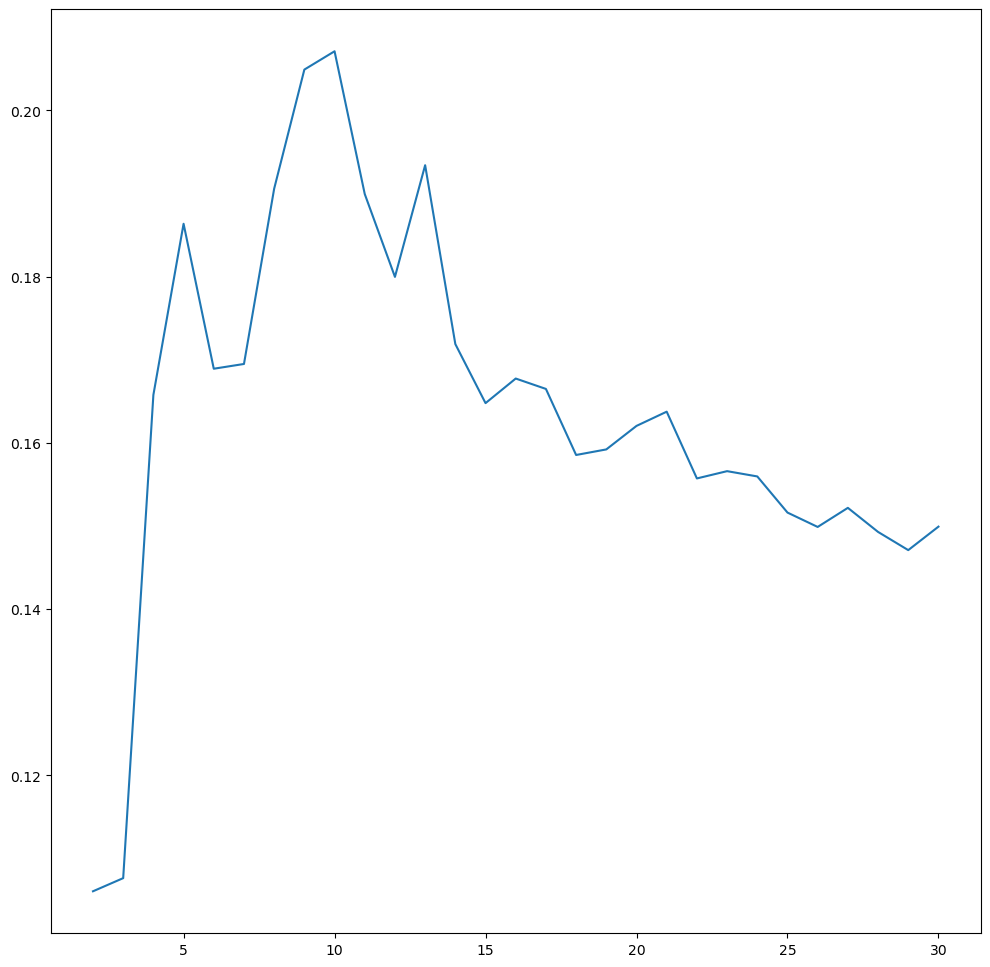

In [106]:
plot_silhoutte_score(X,30)

We plot number of clusters vs silhoutte score, the silhoutte score hits it's maximum at around 10 clusters.

#### Soft clustering

-> In soft clustering every point is a part of every cluster with a certain probability.
-> Gaussian Mixture Model is a soft clustering algorithm which uses Estimation Maximization algorithm to learn the parameters.
-> The following function finds the best covariance type and number of components based on bayesian information criterion.

In [110]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

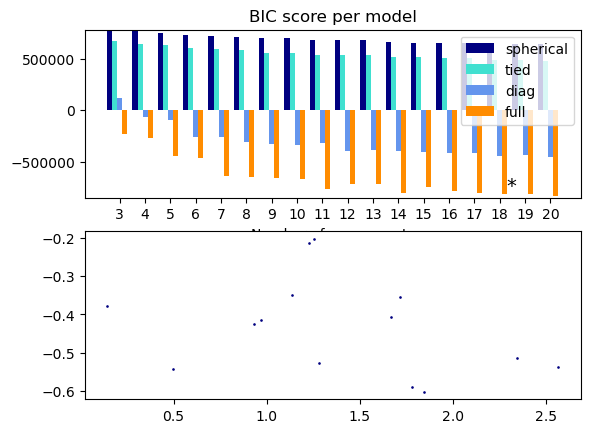

In [111]:
gmm = ncomponents_of_gmm(X, 3, 20)

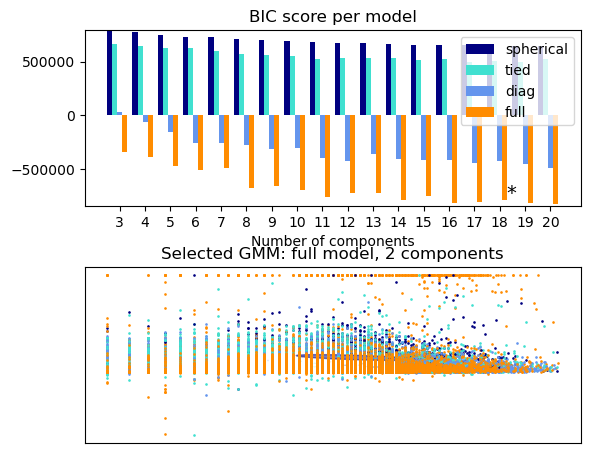

In [161]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components + 1)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
    
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range): (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(xy=mean, width=v[0], height=v[1], angle=180. + angle, color=color, alpha=0.5)
        ell.set_clip_box(splot.bbox)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    
    return best_gmm

# Example usage:
gmm = ncomponents_of_gmm(X, 3, 20)


### Validity Index

-> When the number of clusters is less than the correct number of clusters then the data is under partitioned, if the number of clusters is more than the correct number of clusters then the data is over partitioned.<br>
-> Sum of distances from the data points to the corresponding cluster centers is a measure of under partition.<br>
-> Number of clusters devided by minimum distance between two clusters is a measure of over partition, it increases when the data is more over partitioned.<br>
-> A normalized sum of these two can help finding the actual number of clusters.<br>
-> This idea is published in this paper:http://armi.kaist.ac.kr/korean/files/_2001______________________a_novel_validity_index_for_determination_of_the_optimal_number_of_clutters_.pdf

The same has been implemented in the following functions.

In [166]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

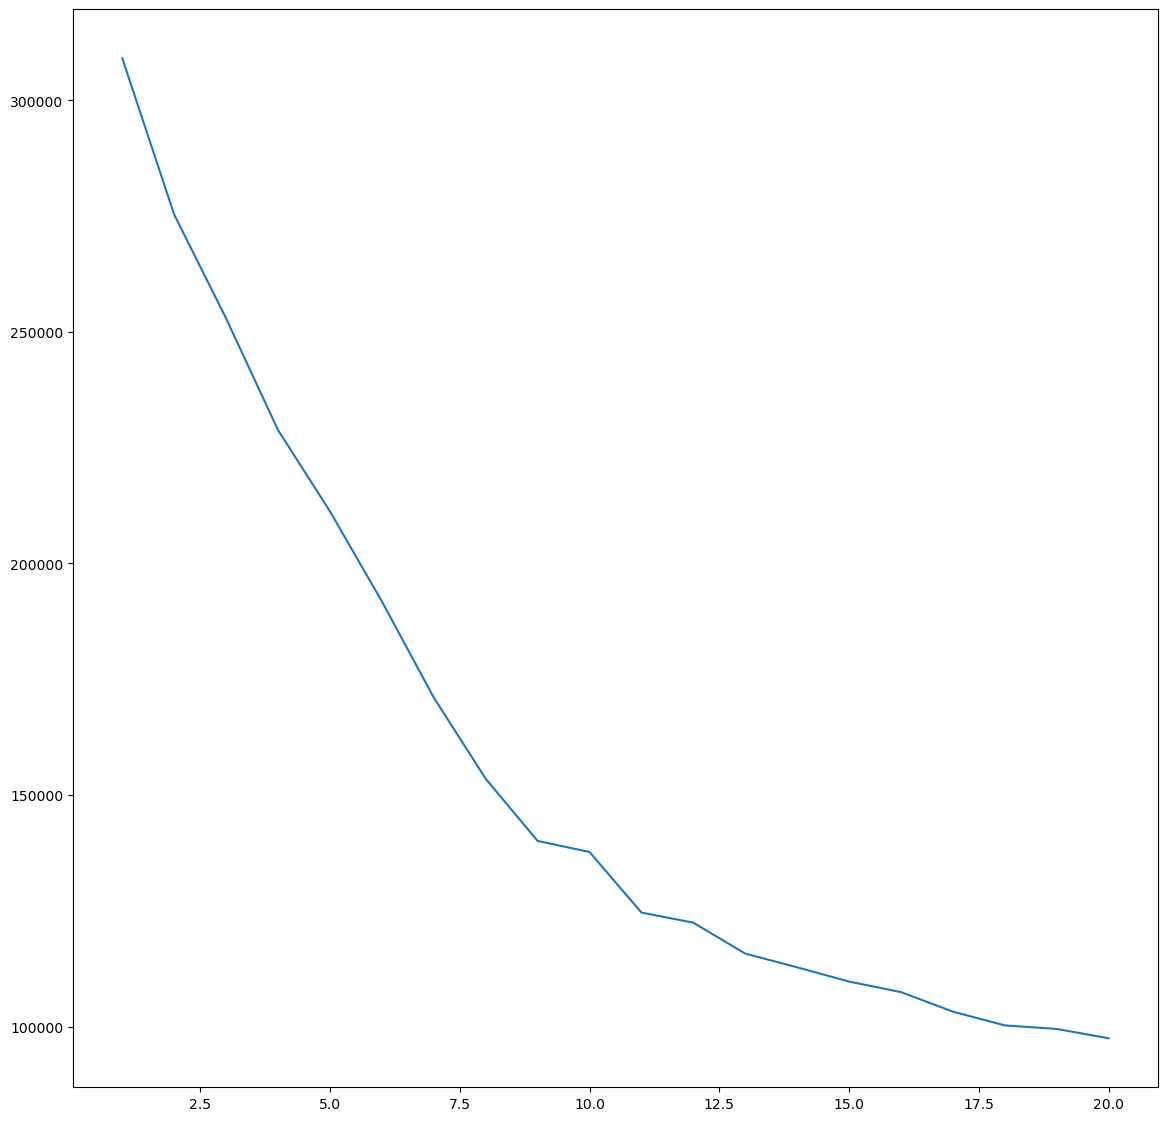

In [168]:
_ = under_partition_measure(X, 20)

This is same as the elbow we saw before.

In [171]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, OPM)
    plt.show()
    return OPM

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

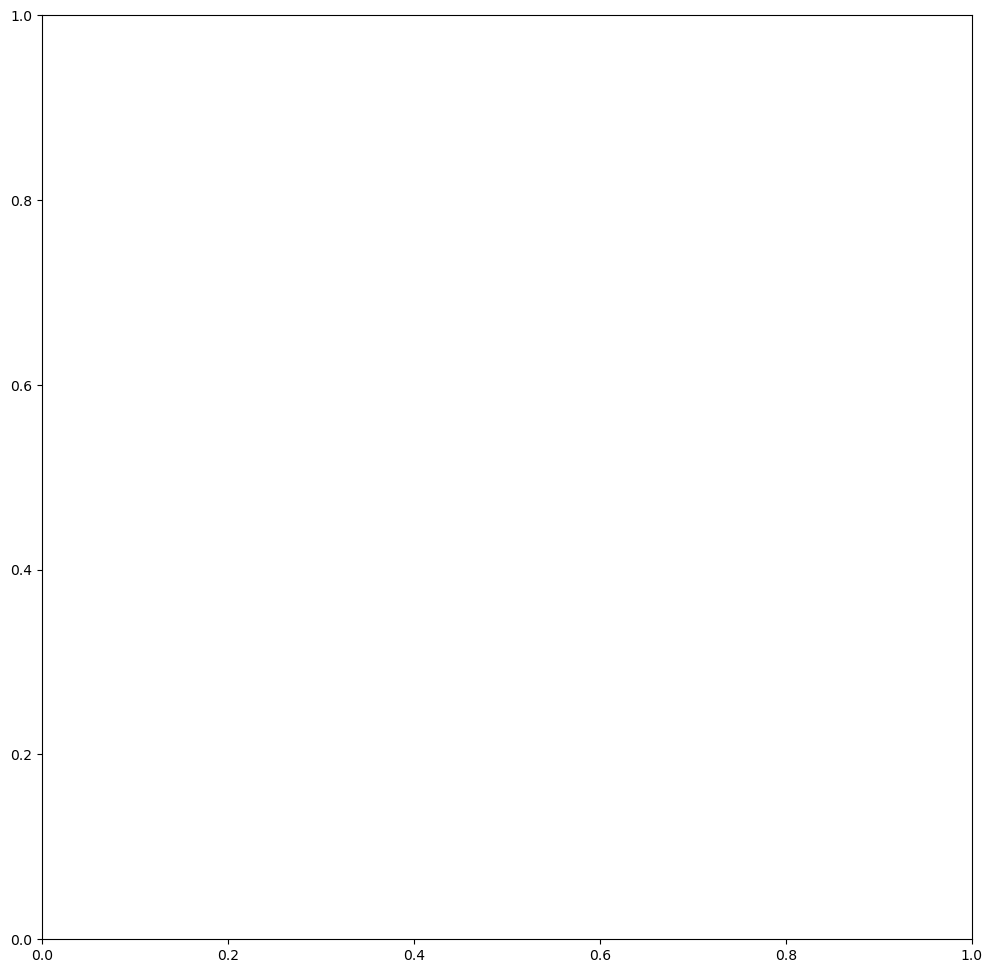

In [173]:
_ = over_partition_measure(X, 20)

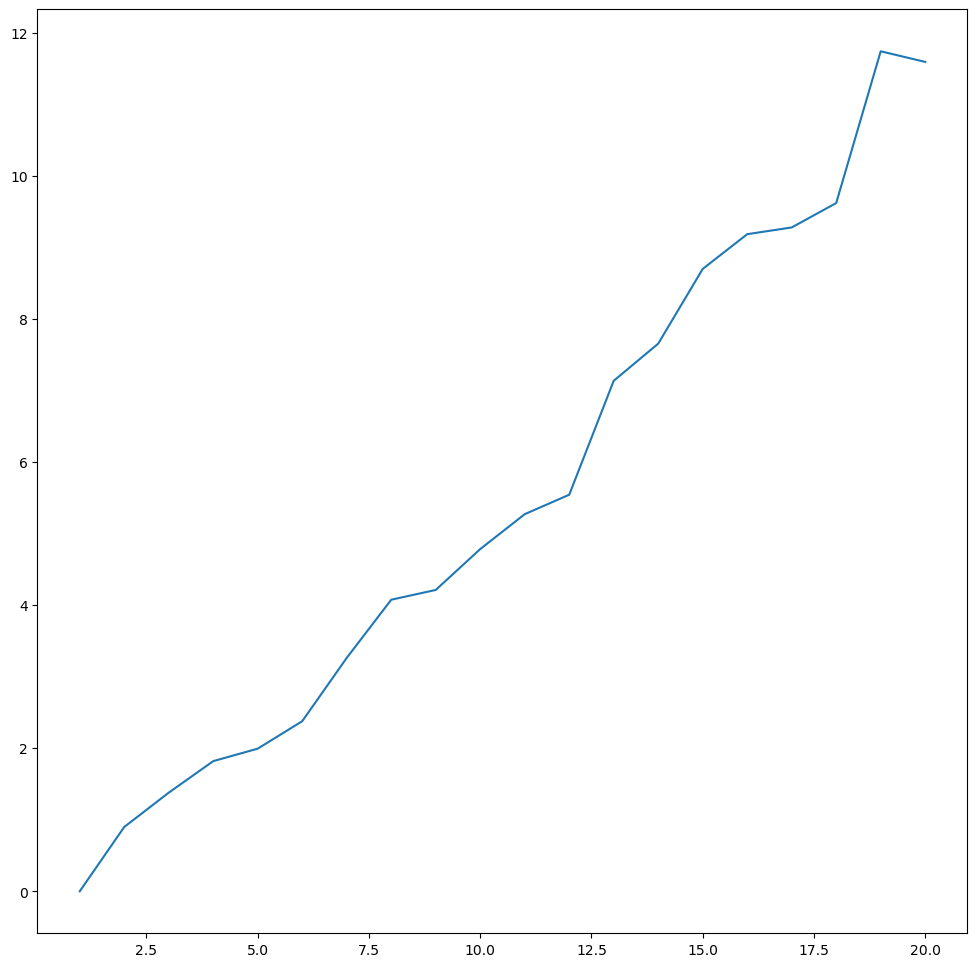

In [177]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import pairwise_distances
    import numpy as np
    import itertools
    ks = range(1, k_max + 1)
    OPM = []
    
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1, -1), pair[1].reshape(1, -1), metric='euclidean')[0][0]
            if d < d_min:
                d_min = d
        OPM.append(k / d_min)
        
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(ks, OPM)
    plt.show()
    
    return OPM

# Example usage:
_ = over_partition_measure(X, 20)


In [179]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

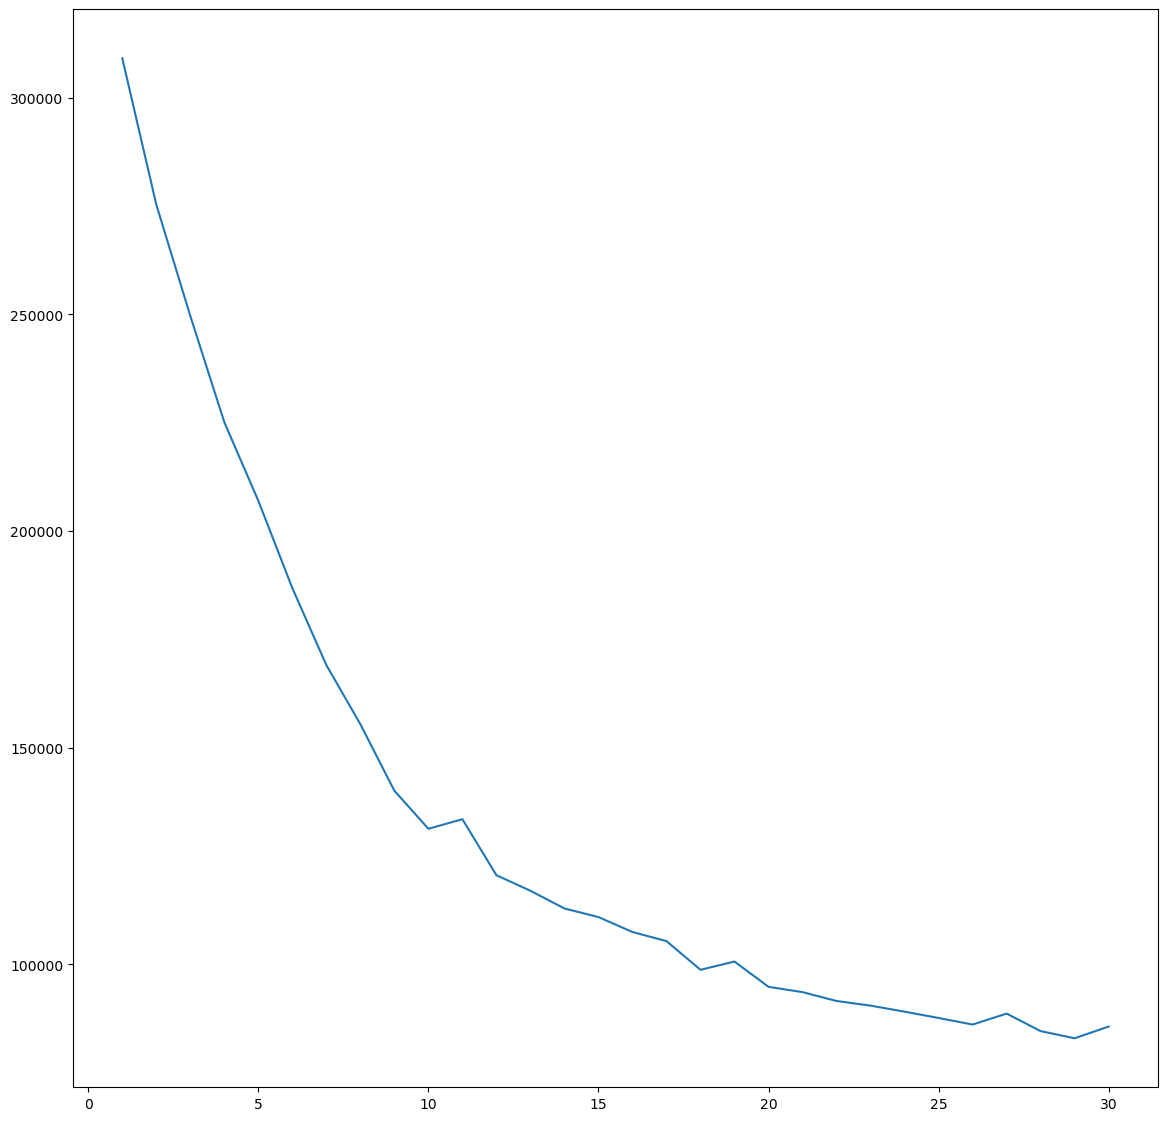

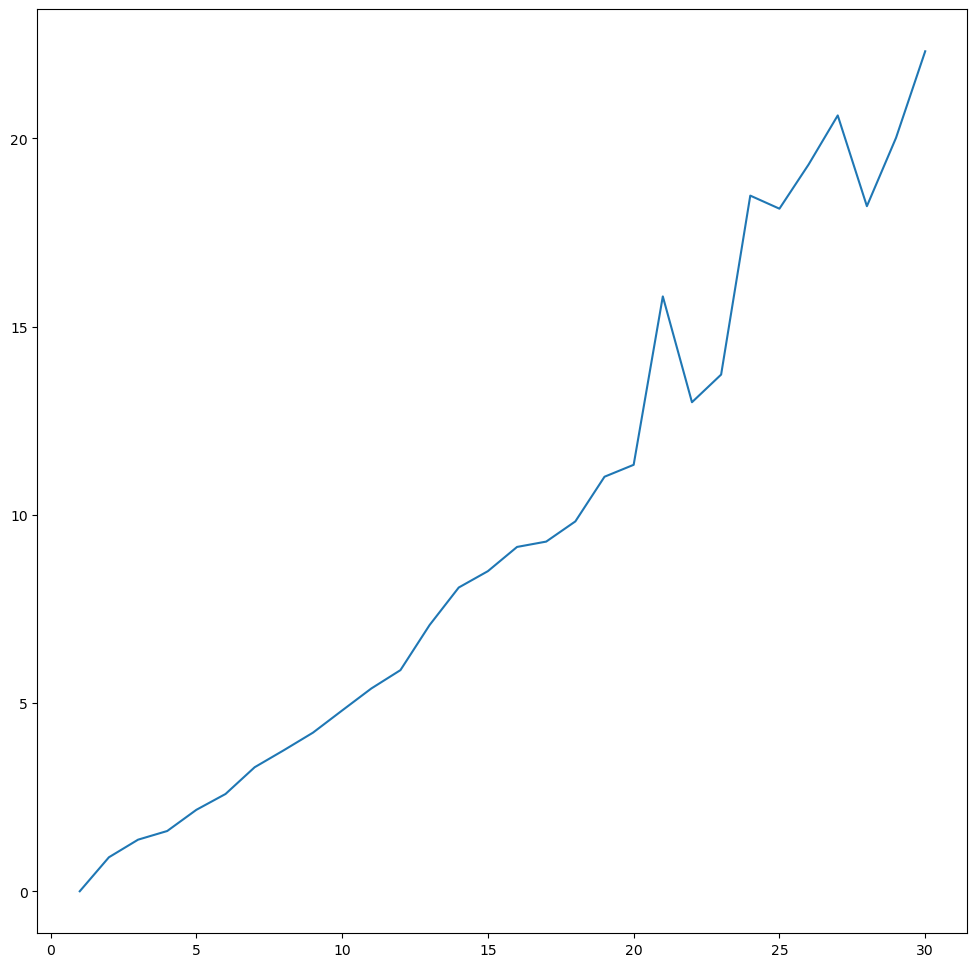

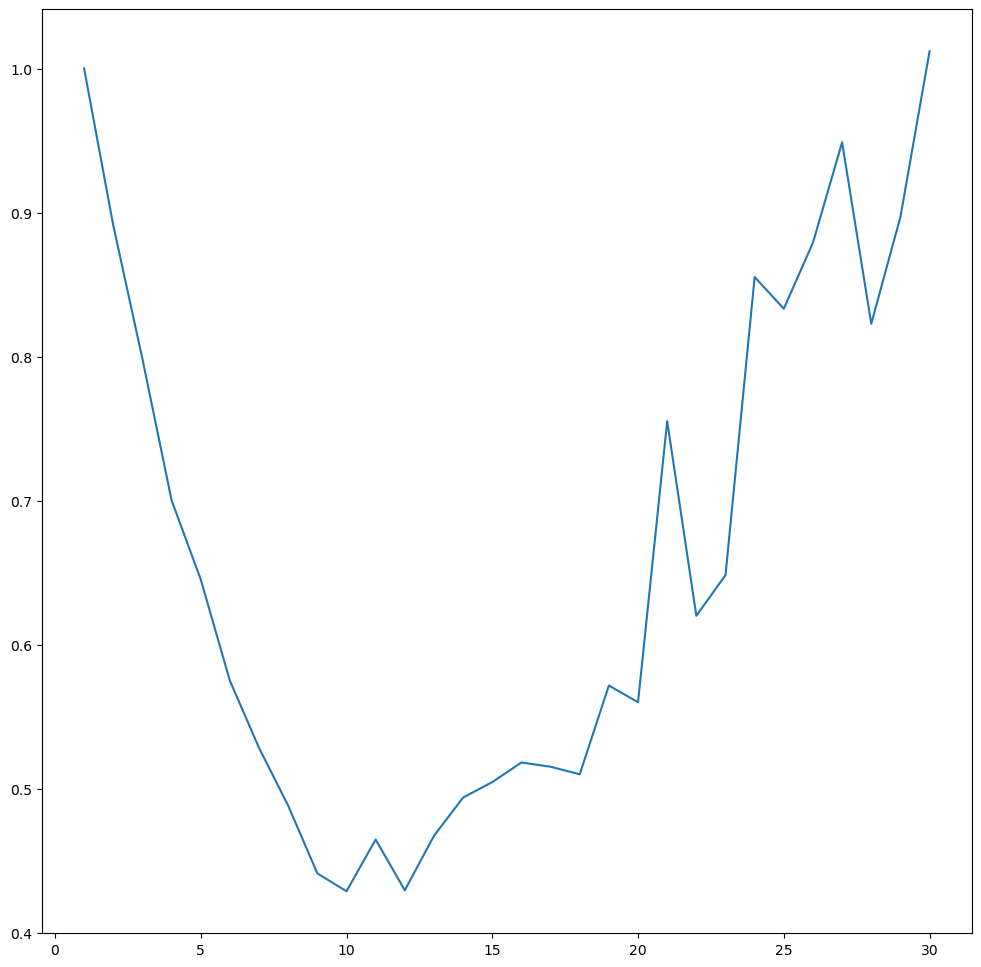

In [181]:
_ = validity_index(X, 30)

This again gives us a surety that, there are around 10 clusters.

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### 7) Clustering and interpretation

In [185]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [186]:
frame[frame['labels']==0]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
33            3     33           36      15.02        1    12  27.55   22.82   
115          11    115           24      16.27        4    21  17.02    3.77   
120          12    120           26       0.53        5    13  29.91    3.33   
121          12    121           26       4.11        1    12  12.05    7.99   
125          12    125           40       2.09        3    15  23.18    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29957     10215  29957           28       7.14        4    15  33.14   13.10   
29961     10217  29961            6      22.04        7    19   0.00    0.00   
29976     10225  29976            8       3.06        4    12   0.00    0.00   
29985     10230  29985           13       4.94        1    23  13.33    0.00   
29986     10230  29986           12       5.00        3    14  14.37    0.00   

       Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  labels  
33        5.96   0.00     0.00      0.0   43.67    0.0       0  
115       3.12   0.00     0.00      0.0   76.10    0.0       0  
120      21.63   6.65     0.00      0.0   38.48    0.0       0  
121      15.80  24.65     0.00      0.0   39.51    0.0       0  
125      10.95  15.49     0.00      0.0   50.38    0.0       0  
...        ...    ...      ...      ...     ...    ...     ...  
29957     8.63   3.42     0.00      0.0   41.71    0.0       0  
29961     0.00   0.00     0.00      0.0  100.00    0.0       0  
29976     0.00   0.00     0.00      0.0  100.00    0.0       0  
29985    13.99   4.90     6.39      0.0   61.39    0.0       0  
29986    11.84   3.92     2.38      0.0   67.49    0.0       0  

[2547 rows x 15 columns]

In [188]:
frame[frame['labels']==0].describe()

customer         order  total_items    discount%      weekday  \
count   2547.000000   2547.000000  2547.000000  2547.000000  2547.000000   
mean    4877.459757  14587.578720    18.292501     8.958265     3.656851   
std     2835.811143   8501.233303    11.179762     9.980268     2.224806   
min        3.000000     33.000000     6.000000   -23.890000     1.000000   
25%     2410.000000   7136.500000    10.000000     1.070000     2.000000   
50%     4886.000000  14571.000000    16.000000     4.780000     3.000000   
75%     7116.000000  21330.500000    23.000000    14.700000     6.000000   
max    10230.000000  29986.000000   126.000000    53.290000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2547.000000  2547.000000  2547.000000  2547.000000  2547.000000   
mean     15.091088     7.472996     4.516985    12.907715     7.805669   
std       5.989545     9.194696     8.158965    12.317560    10.449694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     0.000000     0.000000     0.000000     0.000000   
50%      15.000000     4.340000     0.000000    10.460000     3.060000   
75%      21.000000    11.970000     6.250000    20.865000    12.880000   
max      23.000000    57.680000    45.850000    56.030000    53.110000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2547.000000  2547.000000  2547.000000  2547.000000  2547.0  
mean      2.489097     0.460118    63.946117     0.229097     0.0  
std       5.108781     2.251860    19.808446     1.742131     0.0  
min       0.000000     0.000000    26.030000     0.000000     0.0  
25%       0.000000     0.000000    47.255000     0.000000     0.0  
50%       0.000000     0.000000    59.750000     0.000000     0.0  
75%       2.840000     0.000000    79.555000     0.000000     0.0  
max      33.730000    18.970000   100.000000    25.040000     0.0

-> These class of people seem to order beauty products a lot.<br>
-> They must be beauty concious people, let's call them beauty concious.

In [193]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [195]:
frame[frame['labels']==1]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
15            1     15           27      21.80        1     9   48.23   20.37   
24            3     24           28       2.21        1    10   36.51   31.93   
36            3     36            9       2.86        2    11   55.24   44.76   
43            3     43           20       0.41        2    13   65.64   12.36   
49            4     49            7       3.06        1    13  100.00    0.00   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29969     10221  29969           36       0.00        4    11  100.00    0.00   
29970     10221  29970           25       3.56        2    14   67.28    0.00   
29971     10221  29971           25       4.06        2    13  100.00    0.00   
29972     10221  29972           31       3.67        3    12   95.73    0.00   
29989     10231  29989           15       7.70        1     0   61.32    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
15       15.38   8.29     7.73      0.0    0.0    0.0       1   NaN  
24       27.18   4.38     0.00      0.0    0.0    0.0       1   NaN  
36        0.00   0.00     0.00      0.0    0.0    0.0       1   NaN  
43       21.99   0.00     0.00      0.0    0.0    0.0       1   NaN  
49        0.00   0.00     0.00      0.0    0.0    0.0       1   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29969     0.00   0.00     0.00      0.0    0.0    0.0       1   NaN  
29970    32.72   0.00     0.00      0.0    0.0    0.0       1   NaN  
29971     0.00   0.00     0.00      0.0    0.0    0.0       1   NaN  
29972     4.27   0.00     0.00      0.0    0.0    0.0       1   NaN  
29989    23.34  15.34     0.00      0.0    0.0    0.0       1   NaN  

[5460 rows x 16 columns]

In [197]:
frame[frame['labels']==1].describe()

customer         order  total_items    discount%      weekday  \
count   5460.000000   5460.000000  5460.000000  5460.000000  5460.000000   
mean    5041.260806  15093.806410    38.000733     6.056967     2.434615   
std     2929.133777   8781.091658    18.866302     7.255862     1.350721   
min        1.000000     15.000000     6.000000   -11.990000     1.000000   
25%     2471.750000   7363.250000    26.000000     1.480000     1.000000   
50%     5152.000000  15317.500000    34.000000     3.780000     2.000000   
75%     7519.000000  22643.500000    47.000000     7.890000     3.000000   
max    10231.000000  29989.000000   134.000000    51.900000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5460.000000  5460.000000  5460.000000  5460.000000  5460.000000   
mean     14.906410    46.478386    11.082355    23.029018    11.169742   
std       5.747052    19.763601    11.650142    13.696600    10.218810   
min       0.000000     4.140000     0.000000     0.000000     0.000000   
25%      11.000000    32.217500     0.000000    12.767500     0.000000   
50%      15.000000    42.790000     8.170000    22.780000     9.450000   
75%      20.000000    56.070000    20.560000    32.925000    18.672500   
max      23.000000   100.000000    44.850000    61.790000    44.670000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5460.000000  5460.000000  5460.000000  5460.000000  5460.0  
mean      3.822154     0.536183     3.133245     0.617079     1.0  
std       5.706245     2.028429     8.179614     2.653582     0.0  
min       0.000000     0.000000     0.000000     0.000000     1.0  
25%       0.000000     0.000000     0.000000     0.000000     1.0  
50%       0.000000     0.000000     0.000000     0.000000     1.0  
75%       6.400000     0.000000     0.000000     0.000000     1.0  
max      29.540000    15.630000    52.070000    22.670000     1.0

-> These are the class of people who have ordered drinks a lot.<br>
-> These people had to face a lot of extra charges for drink purchases.<br>
-> They are potential customers, as we all know drinks can be addictive atleast in a teeny tiny level.

In [200]:
frame.loc[frame['labels']==1, 'class'] = 'drink_buyers'

In [202]:
frame[frame['labels']==2]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
11            1     11            7      15.00        1     8   0.00   39.93   
96            8     96           32      24.44        4    22   7.18   33.83   
140          18    140           16      21.57        4    13   1.69   36.07   
164          27    164           15       8.69        7    11  31.68    0.00   
165          27    165           23       0.00        7    12  25.35    6.84   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29958     10215  29958           15       3.18        1    13   6.47   20.15   
29988     10231  29988            8       0.52        4     9  28.21    0.00   
29991     10231  29991           15       3.92        5    11  23.38   35.70   
29997     10237  29997           54       0.00        4    17   9.25    0.00   
29998     10237  29998           10       0.00        5    10   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
11       60.07   0.00     0.00      0.0   0.00    0.0       2   NaN  
96       53.07   5.92     0.00      0.0   0.00    0.0       2   NaN  
140      62.24   0.00     0.00      0.0   0.00    0.0       2   NaN  
164      61.41   2.76     4.15      0.0   0.00    0.0       2   NaN  
165      61.86   5.95     0.00      0.0   0.00    0.0       2   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29958    51.74  10.27     0.00      0.0  11.37    0.0       2   NaN  
29988    48.34  23.44     0.00      0.0   0.00    0.0       2   NaN  
29991    40.92   0.00     0.00      0.0   0.00    0.0       2   NaN  
29997    77.48  13.27     0.00      0.0   0.00    0.0       2   NaN  
29998   100.00   0.00     0.00      0.0   0.00    0.0       2   NaN  

[3410 rows x 16 columns]

In [204]:
frame[frame['labels']==2].describe()

customer         order  total_items    discount%      weekday  \
count   3410.000000   3410.000000  3410.000000  3410.000000  3410.000000   
mean    4988.964809  14940.232845    23.530499     5.590721     3.407331   
std     2923.514196   8759.948279    11.746682     7.926205     1.882530   
min        1.000000     11.000000     6.000000   -65.150000     1.000000   
25%     2309.000000   6784.750000    15.000000     0.652500     2.000000   
50%     5023.000000  14959.500000    22.000000     3.480000     3.000000   
75%     7564.500000  22782.000000    30.000000     7.667500     5.000000   
max    10237.000000  29998.000000    98.000000    66.140000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  3410.000000  3410.000000  3410.000000  3410.000000  3410.000000   
mean     14.650440    12.357000     5.864349    68.864768     8.000894   
std       5.451278    11.795897     9.805147    18.065445    10.053384   
min       0.000000     0.000000     0.000000    19.490000     0.000000   
25%      11.000000     0.000000     0.000000    54.582500     0.000000   
50%      15.000000    10.455000     0.000000    64.925000     3.395000   
75%      19.000000    20.162500     9.335000    82.077500    14.197500   
max      23.000000    59.130000    55.780000   100.000000    43.230000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  3410.000000  3410.000000  3410.000000  3410.000000  3410.0  
mean      2.120419     0.233909     2.077179     0.302009     2.0  
std       4.788405     1.451592     6.929839     2.015919     0.0  
min       0.000000     0.000000     0.000000     0.000000     2.0  
25%       0.000000     0.000000     0.000000     0.000000     2.0  
50%       0.000000     0.000000     0.000000     0.000000     2.0  
75%       0.000000     0.000000     0.000000     0.000000     2.0  
max      29.400000    16.720000    45.820000    23.820000     2.0

-> These are again very loyal customers who depend on ulabox for a lot of things.<br>
-> They tend to buy grocery a little more, let's call them loyals grocery.

In [207]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'

In [209]:
frame[frame['labels']==3]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
107           9    107           29       8.02        7    10  25.62   19.48   
111          10    111           23      15.94        1    19   9.37    0.00   
112          10    112           26       6.93        3    22   4.93    0.00   
152          22    152           31       5.19        7    16   9.96   13.96   
158          25    158           23       1.30        2    19   1.74   18.27   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29894     10192  29894           25      36.56        6    11   5.24    0.00   
29900     10195  29900            6      25.00        2    13   0.00    0.00   
29920     10200  29920            7       1.74        5    11   0.00    0.00   
29936     10205  29936           22      13.43        3    20  12.04    0.00   
29979     10227  29979           37      15.57        1    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
107      17.34   8.28    29.27     0.00   0.00    0.0       3   NaN  
111       0.00  42.45    48.18     0.00   0.00    0.0       3   NaN  
112       0.00  34.17    54.72     6.17   0.00    0.0       3   NaN  
152      21.65  21.51    27.56     0.00   5.35    0.0       3   NaN  
158      21.33  25.14    24.13     9.39   0.00    0.0       3   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29894    14.56  45.24    31.06     0.00   0.00    3.9       3   NaN  
29900     0.00   0.00   100.00     0.00   0.00    0.0       3   NaN  
29920    13.79  23.37    62.84     0.00   0.00    0.0       3   NaN  
29936    47.67   0.00    40.28     0.00   0.00    0.0       3   NaN  
29979     0.00   0.00    90.67     0.00   9.33    0.0       3   NaN  

[1108 rows x 16 columns]

In [211]:
frame[frame['labels']==3].describe()

customer         order  total_items    discount%      weekday  \
count   1108.000000   1108.000000  1108.000000  1108.000000  1108.000000   
mean    4427.730144  13240.225632    25.477437    11.584558     3.754513   
std     3016.622779   9007.057020    13.758874    11.980588     2.136538   
min        9.000000    107.000000     6.000000    -7.810000     1.000000   
25%     1685.000000   5036.750000    16.000000     2.687500     2.000000   
50%     3972.000000  11765.500000    24.000000     7.850000     3.000000   
75%     7002.000000  20952.250000    31.000000    16.090000     6.000000   
max    10227.000000  29979.000000   139.000000    61.860000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  1108.000000  1108.000000  1108.000000  1108.000000  1108.000000   
mean     14.935018    15.980605     8.531868    15.406020    13.926552   
std       5.826870    13.874165    12.985191    14.538892    14.420034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000     3.707500     0.000000     0.000000     0.000000   
50%      15.000000    14.275000     0.000000    12.435000     9.840000   
75%      20.000000    24.660000    14.837500    24.092500    24.075000   
max      23.000000    73.090000    68.770000    69.630000    65.060000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  1108.000000  1108.000000  1108.000000  1108.000000  1108.0  
mean     40.822347     0.854946     3.850551     0.372148     3.0  
std      19.317798     3.182361    10.369693     2.271797     0.0  
min      19.230000     0.000000     0.000000     0.000000     3.0  
25%      28.077500     0.000000     0.000000     0.000000     3.0  
50%      33.350000     0.000000     0.000000     0.000000     3.0  
75%      46.257500     0.000000     0.000000     0.000000     3.0  
max     100.000000    24.790000    63.450000    24.090000     3.0

-> These customers buy all kinds of products from ulabox, fresh, drinks and food dominnantly.<br>
-> These are the loyal customers of ulabox who depends on ulabox for everything. <br>
-> Let's call them loyals. <br>

In [214]:
frame.loc[frame['labels']==3, 'class'] = 'loyals'

In [216]:
frame[frame['labels']==4]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
461         109    461           43       5.75        2    12  22.37     0.0   
551         129    551           12      25.04        2    20   0.00     0.0   
579         141    579           14      11.36        5    22   0.00     0.0   
580         141    580           22       0.00        5     6   0.00     0.0   
622         158    622           28       2.08        5    11  21.41     0.0   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29791     10143  29791           11      21.96        2    16   0.00     0.0   
29893     10192  29893           24      40.37        5    19  24.37     0.0   
29896     10192  29896           35       6.32        3    13   6.03     0.0   
29905     10198  29905           21       7.90        4    19  20.99     0.0   
29906     10198  29906           20       1.92        4    17  12.46     0.0   

       Drinks%  Home%  Beauty%  Health%  Baby%   Pets%  labels class  
461      25.56   3.42    12.18     2.81    0.0   33.65       4   NaN  
551       0.00   0.00     0.00     0.00    0.0  100.00       4   NaN  
579      67.13   0.00     0.00     0.00    0.0   32.87       4   NaN  
580      72.56   0.00     0.00     0.00    0.0   27.44       4   NaN  
622      21.76   8.53     5.68     0.00    0.0   42.61       4   NaN  
...        ...    ...      ...      ...    ...     ...     ...   ...  
29791     0.00   0.00     0.00     0.00    0.0  100.00       4   NaN  
29893    29.13   0.00     0.00     0.00    0.0   46.50       4   NaN  
29896    19.48  20.61    16.11     0.00    0.0   37.77       4   NaN  
29905    11.36  32.31     0.00     0.00    0.0   35.35       4   NaN  
29906     4.46  45.37     0.00     0.00    0.0   37.71       4   NaN  

[366 rows x 16 columns]

In [218]:
frame[frame['labels']==4].describe()

customer         order  total_items   discount%     weekday  \
count    366.000000    366.000000   366.000000  366.000000  366.000000   
mean    4988.890710  14892.584699    24.724044    7.830929    3.535519   
std     2771.661805   8292.147142    15.175063    8.474320    2.106115   
min      109.000000    461.000000     6.000000  -18.060000    1.000000   
25%     2880.000000   8259.500000    15.000000    1.315000    2.000000   
50%     5054.000000  15037.500000    21.000000    5.430000    3.000000   
75%     7227.750000  21672.750000    30.000000   11.842500    5.000000   
max    10198.000000  29906.000000    98.000000   42.420000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  366.000000  366.000000  366.000000  366.000000  366.000000  366.000000   
mean    14.704918   14.031749   10.938443   16.068825   10.650656    3.402240   
std      5.708473   12.892957   15.341996   15.832466   13.020089    7.309339   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    2.682500    0.000000    0.000000   
50%     14.000000   13.010000    1.945000   12.310000    6.410000    0.000000   
75%     20.000000   21.515000   18.582500   24.502500   16.857500    4.310000   
max     23.000000   55.810000   62.880000   75.340000   69.480000   47.250000   

          Health%       Baby%       Pets%  labels  
count  366.000000  366.000000  366.000000   366.0  
mean     0.513005    2.473907   41.881858     4.0  
std      2.821243    8.627801   21.265348     0.0  
min      0.000000    0.000000   20.680000     4.0  
25%      0.000000    0.000000   26.770000     4.0  
50%      0.000000    0.000000   34.255000     4.0  
75%      0.000000    0.000000   48.495000     4.0  
max     26.290000   71.670000  100.000000     4.0

-> This should be the class of orders that buy a lot of home utility products like floor cleaner, curtains, washing powder etc.<br>
-> Let's call this people home decorators.

In [221]:
frame.loc[frame['labels']==4, 'class'] = 'home_decorators'

In [223]:
frame[frame['labels']==5]

customer  order  total_items  discount%  weekday  hour   Food%  Fresh%  \
435         100    435           38      49.11        1    21   98.15    0.00   
436         100    436           78      51.85        3    16   69.90    0.00   
437         100    437           78      46.89        2    19   84.86    0.00   
438         100    438          135      52.00        7    22   73.57    0.00   
965         260    965           23     100.00        2    11   20.50   41.56   
...         ...    ...          ...        ...      ...   ...     ...     ...   
29131      9856  29131           15     100.00        3     3  100.00    0.00   
29538     10025  29538          122     100.00        6    20  100.00    0.00   
29769     10129  29769           24     100.00        2    12  100.00    0.00   
29770     10129  29770           23     100.00        2    12  100.00    0.00   
29881     10185  29881            7      48.50        4     3   97.01    2.99   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
435       1.85   0.00     0.00      0.0   0.00    0.0       5   NaN  
436      29.01   0.00     0.00      0.0   1.09    0.0       5   NaN  
437       7.79   4.24     0.00      0.0   3.11    0.0       5   NaN  
438      24.68   0.00     0.00      0.0   0.00    0.0       5   NaN  
965      22.99   9.03     5.92      0.0   0.00    0.0       5   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29131     0.00   0.00     0.00      0.0   0.00    0.0       5   NaN  
29538     0.00   0.00     0.00      0.0   0.00    0.0       5   NaN  
29769     0.00   0.00     0.00      0.0   0.00    0.0       5   NaN  
29770     0.00   0.00     0.00      0.0   0.00    0.0       5   NaN  
29881     0.00   0.00     0.00      0.0   0.00    0.0       5   NaN  

[507 rows x 16 columns]

In [225]:
frame[frame['labels']==5].describe()

customer         order  total_items   discount%     weekday  \
count    507.000000    507.000000   507.000000  507.000000  507.000000   
mean    3202.796844   9517.364892    46.575937   93.727022    3.611440   
std     2248.547329   6719.055207    24.454597   14.129857    2.024774   
min      100.000000    435.000000     6.000000   42.080000    1.000000   
25%     1645.000000   4908.500000    27.000000  100.000000    2.000000   
50%     2562.000000   7530.000000    46.000000  100.000000    3.000000   
75%     3421.000000   9839.000000    63.000000  100.000000    5.000000   
max    10185.000000  29881.000000   135.000000  100.000000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean    15.236686   93.582387    2.173866    2.231854    0.952485    0.438659   
std      5.012947   17.881166   10.849385    7.645513    4.767255    2.606345   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
50%     15.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
75%     19.000000  100.000000    0.000000    0.000000    0.000000    0.000000   
max     23.000000  100.000000  100.000000   75.020000   37.410000   33.070000   

          Health%       Baby%       Pets%  labels  
count  507.000000  507.000000  507.000000   507.0  
mean     0.082643    0.372327    0.141677     5.0  
std      0.974658    2.975978    1.729619     0.0  
min      0.000000    0.000000    0.000000     5.0  
25%      0.000000    0.000000    0.000000     5.0  
50%      0.000000    0.000000    0.000000     5.0  
75%      0.000000    0.000000    0.000000     5.0  
max     15.420000   37.220000   24.080000     5.0

-> This class of orders buy a lot of Food, Fresh and Drinks. With Fresh being more dominant.<br>
-> These orders might be a little valuable, as these orders cover Food%, Fresh%, Drinnks%, Home%.

In [228]:
frame.loc[frame['labels']==5, 'class'] = 'loyals_fresh'

In [230]:
frame[frame['labels']==6]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0             0      0           45      23.03        4    13   9.46   87.06   
1             0      1           38       1.22        5    13  15.87   75.80   
2             0      2           51      18.08        4    13  16.88   56.75   
4             1      4           53      18.31        2    11  24.13   60.38   
5             1      5            8      23.89        4    13   0.00  100.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29968     10220  29968           19       2.01        2     8  20.54   52.23   
29973     10222  29973           20       3.95        1     8  17.51   59.08   
29975     10224  29975           27       0.00        4    12  38.09   56.94   
29980     10228  29980           31      32.89        1    23  24.12   34.54   
29981     10228  29981           27      27.91        2    12  19.43   53.57   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
0         3.48   0.00     0.00     0.00   0.00   0.00       6   NaN  
1         6.22   2.12     0.00     0.00   0.00   0.00       6   NaN  
2         3.37  16.48     6.53     0.00   0.00   0.00       6   NaN  
4         7.78   7.72     0.00     0.00   0.00   0.00       6   NaN  
5         0.00   0.00     0.00     0.00   0.00   0.00       6   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29968     0.00   0.00     0.00     0.00  27.23   0.00       6   NaN  
29973     6.71   0.00    10.39     0.00   0.00   6.31       6   NaN  
29975     4.96   0.00     0.00     0.00   0.00   0.00       6   NaN  
29980    26.02   7.38     7.94     0.00   0.00   0.00       6   NaN  
29981     2.80   7.98     3.57    12.66   0.00   0.00       6   NaN  

[6101 rows x 16 columns]

In [232]:
frame[frame['labels']==6].describe()

customer         order  total_items    discount%      weekday  \
count   6101.000000   6101.000000  6101.000000  6101.000000  6101.000000   
mean    5396.635306  16158.128176    38.229634     5.267353     2.885756   
std     2785.677440   8376.217840    18.478713     6.660597     1.677888   
min        0.000000      0.000000     6.000000     0.000000     1.000000   
25%     3393.000000   9747.000000    26.000000     1.000000     1.000000   
50%     5670.000000  16861.000000    34.000000     3.030000     3.000000   
75%     7773.000000  23478.000000    46.000000     6.860000     4.000000   
max    10228.000000  29981.000000   139.000000    65.100000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  6101.000000  6101.000000  6101.000000  6101.000000  6101.000000   
mean     15.006720    18.581079    55.464775    13.584748     6.436550   
std       5.885251    10.748693    16.033244    10.531160     7.643773   
min       0.000000     0.000000    19.810000     0.000000     0.000000   
25%      11.000000    10.730000    43.210000     5.650000     0.000000   
50%      15.000000    17.760000    53.450000    11.860000     3.810000   
75%      20.000000    25.710000    66.100000    19.710000    10.270000   
max      23.000000    55.570000   100.000000    53.780000    44.100000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  6101.000000  6101.000000  6101.000000  6101.000000  6101.0  
mean      2.669810     0.486171     2.202929     0.505584     6.0  
std       4.562472     1.981650     6.538742     2.288858     0.0  
min       0.000000     0.000000     0.000000     0.000000     6.0  
25%       0.000000     0.000000     0.000000     0.000000     6.0  
50%       0.000000     0.000000     0.000000     0.000000     6.0  
75%       3.980000     0.000000     0.000000     0.000000     6.0  
max      26.250000    17.030000    48.620000    22.680000     6.0

-> These class of people have brought baby products a lot.<br>
-> They must be couple with new babies, let's call them new parents.

In [235]:
frame.loc[frame['labels']==6, 'class'] = 'new_parents'

In [237]:
frame[frame['labels']==7]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
76            5     76           21      11.76        2    23   6.84    0.00   
93            8     93           17      30.60        1    22  24.87    0.00   
119          12    119           21       3.13        4    23  23.02    3.20   
124          12    124           33       0.09        2    22  20.06    0.00   
135          15    135           25      10.98        7    14   0.00   12.29   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29931     10201  29931           21      12.71        4    12  19.58    0.00   
29945     10209  29945           19       1.77        4    19   5.52    8.72   
29974     10223  29974           21      27.09        4    11  33.93    0.00   
29984     10230  29984           31      15.93        4    14  11.65   11.07   
29987     10230  29987           27       9.83        3    14  14.82    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
76       24.02  26.87    10.21     0.00  32.06    0.0       7   NaN  
93       15.77  48.51    10.85     0.00   0.00    0.0       7   NaN  
119      18.48  26.39     3.80     0.00  25.12    0.0       7   NaN  
124      27.57  34.37     0.00     0.00  17.99    0.0       7   NaN  
135      25.54  51.25     6.73     4.19   0.00    0.0       7   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29931    14.86  56.12     9.43     0.00   0.00    0.0       7   NaN  
29945    20.18  36.85     0.00     0.00  28.72    0.0       7   NaN  
29974    17.46  41.46     7.15     0.00   0.00    0.0       7   NaN  
29984    23.11  27.17     0.00     0.00  26.99    0.0       7   NaN  
29987    14.27  44.97     0.00     0.00  25.93    0.0       7   NaN  

[2863 rows x 16 columns]

In [239]:
frame[frame['labels']==7].describe()

customer         order  total_items    discount%      weekday  \
count   2863.000000   2863.000000  2863.000000  2863.000000  2863.000000   
mean    4452.398882  13316.088020    26.879497    12.640405     3.325882   
std     2911.771644   8704.199186    14.253292    10.348354     1.990803   
min        5.000000     76.000000     6.000000   -23.980000     1.000000   
25%     1950.000000   5783.500000    17.000000     4.445000     2.000000   
50%     4114.000000  12249.000000    25.000000    11.030000     3.000000   
75%     6858.500000  20565.000000    33.000000    18.530000     5.000000   
max    10230.000000  29987.000000   133.000000    86.090000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  2863.000000  2863.000000  2863.000000  2863.000000  2863.000000   
mean     14.750262    13.509483     5.684352    19.389997    52.432057   
std       5.569409    11.902480     9.894285    14.740653    17.879731   
min       0.000000     0.000000     0.000000     0.000000    20.080000   
25%      11.000000     2.500000     0.000000     6.645000    39.725000   
50%      15.000000    11.910000     0.000000    18.370000    47.880000   
75%      20.000000    21.240000     8.140000    30.770000    60.285000   
max      23.000000    60.010000    61.540000    58.240000   100.000000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  2863.000000  2863.000000  2863.000000  2863.000000  2863.0  
mean      4.355805     0.464789     3.615603     0.465341     7.0  
std       6.413613     1.999563     8.950966     2.566309     0.0  
min       0.000000     0.000000     0.000000     0.000000     7.0  
25%       0.000000     0.000000     0.000000     0.000000     7.0  
50%       0.000000     0.000000     0.000000     0.000000     7.0  
75%       7.515000     0.000000     0.000000     0.000000     7.0  
max      33.310000    15.230000    49.510000    22.210000     7.0

-> This is the class of people who had bought a lot of health products, let's call them health concious people

In [242]:
frame.loc[frame['labels']==7, 'class'] = 'health_concious'

In [244]:
frame[frame['labels']==8]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
3             1      3           57      16.51        1    12  28.81   35.99   
18            1     18           31      16.49        1    12  24.27   33.09   
22            1     22           36      16.62        5     9  18.66   47.13   
101           9    101           15       6.27        7    10  18.10   62.86   
103           9    103           17       4.36        7    23   2.62   25.94   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29826     10161  29826            6      14.98        4    12   0.00   24.00   
29844     10167  29844           26       2.78        5    18  33.34   15.70   
29895     10192  29895           21       7.94        7    14   5.46    0.00   
29956     10214  29956           20       9.95        2     1  11.46   46.20   
29978     10227  29978           22      24.90        4    13   0.00    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
3        11.78   4.62     2.87    15.92    0.0   0.00       8   NaN  
18       16.18   0.00     0.00    26.47    0.0   0.00       8   NaN  
22       17.50   0.00     0.00    16.71    0.0   0.00       8   NaN  
101       0.00   0.00     0.00    19.05    0.0   0.00       8   NaN  
103      50.35   0.00     0.00    21.08    0.0   0.00       8   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29826    17.04   0.00    24.74    34.23    0.0   0.00       8   NaN  
29844    19.04   0.00     3.53    28.39    0.0   0.00       8   NaN  
29895    16.01  20.47    15.22    19.39    0.0  23.45       8   NaN  
29956    17.55   0.00     0.00    24.78    0.0   0.00       8   NaN  
29978     0.00   0.00    55.96    44.04    0.0   0.00       8   NaN  

[689 rows x 16 columns]

In [246]:
frame[frame['labels']==8].describe()

customer         order  total_items   discount%     weekday  \
count    689.000000    689.000000   689.000000  689.000000  689.000000   
mean    4725.300435  14143.518142    25.332366    5.646807    3.728592   
std     2943.978840   8815.525195    13.692686    8.222744    2.129611   
min        1.000000      3.000000     6.000000   -5.540000    1.000000   
25%     2166.000000   6419.000000    16.000000    0.760000    2.000000   
50%     4806.000000  14318.000000    23.000000    2.830000    3.000000   
75%     7165.000000  21472.000000    32.000000    7.140000    6.000000   
max    10227.000000  29978.000000   113.000000   52.490000    7.000000   

             hour       Food%      Fresh%     Drinks%       Home%     Beauty%  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean    14.770682   18.594107   12.065298   17.178723   11.749579    6.894369   
std      5.967422   14.814568   15.604528   15.222663   13.327770   10.093957   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    6.950000    0.000000    5.010000    0.000000    0.000000   
50%     15.000000   16.900000    4.020000   14.670000    7.590000    2.440000   
75%     20.000000   26.390000   21.560000   25.000000   18.590000   10.310000   
max     23.000000   77.690000   75.060000   81.140000   72.470000   65.470000   

          Health%       Baby%       Pets%  labels  
count  689.000000  689.000000  689.000000   689.0  
mean    26.806662    5.820755    0.821480     8.0  
std     13.757332   13.909631    3.541653     0.0  
min     12.800000    0.000000    0.000000     8.0  
25%     17.680000    0.000000    0.000000     8.0  
50%     22.180000    0.000000    0.000000     8.0  
75%     31.430000    0.000000    0.000000     8.0  
max    100.000000   71.000000   36.980000     8.0

-> This is the class of pet lovers, that's obvious from the data we see

In [249]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'

In [251]:
frame[frame['labels']==9]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23            2     23           26       2.97        6    23  24.10   22.29   
25            3     25           67       4.19        7    21  12.47   68.13   
55            4     55           23       5.81        7    21   0.00   53.76   
59            4     59           31       5.46        7    21   2.82   63.50   
70            4     70           18      17.78        7    11  47.05   36.73   
...         ...    ...          ...        ...      ...   ...    ...     ...   
29854     10171  29854           40       1.02        6    16  23.18   24.99   
29922     10200  29922           50       4.31        7    19  24.77   35.44   
29930     10201  29930           41      40.08        7    23  33.02    0.00   
29944     10209  29944           25       0.90        7    20  29.02   27.84   
29990     10231  29990           22       8.97        7    12  29.74   28.72   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels class  
23       38.69  14.92     0.00      0.0   0.00    0.0       9   NaN  
25        3.46  15.93     0.00      0.0   0.00    0.0       9   NaN  
55       33.55  12.69     0.00      0.0   0.00    0.0       9   NaN  
59       18.03   8.45     7.20      0.0   0.00    0.0       9   NaN  
70        7.79   8.42     0.00      0.0   0.00    0.0       9   NaN  
...        ...    ...      ...      ...    ...    ...     ...   ...  
29854    12.89   4.78     4.99      0.0  29.17    0.0       9   NaN  
29922    12.99  11.85    14.95      0.0   0.00    0.0       9   NaN  
29930    17.78  33.73    15.46      0.0   0.00    0.0       9   NaN  
29944     8.58   1.28     0.00      0.0  33.28    0.0       9   NaN  
29990    19.52  22.02     0.00      0.0   0.00    0.0       9   NaN  

[5050 rows x 16 columns]

In [253]:
frame[frame['labels']==9].describe()

customer         order  total_items    discount%      weekday  \
count   5050.000000   5050.000000  5050.000000  5050.000000  5050.000000   
mean    4956.885743  14835.522376    42.539802     6.484012     6.249109   
std     2766.285296   8306.568464    19.507008     6.938441     1.016854   
min        2.000000     23.000000     7.000000    -8.070000     3.000000   
25%     2793.000000   8047.500000    29.000000     1.830000     6.000000   
50%     4870.500000  14519.500000    38.000000     4.335000     7.000000   
75%     7326.000000  21992.750000    51.000000     8.655000     7.000000   
max    10231.000000  29990.000000   140.000000    60.020000     7.000000   

              hour        Food%       Fresh%      Drinks%        Home%  \
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.000000   
mean     16.008119    27.618418    24.912448    22.769895    13.163960   
std       5.559713    13.525010    17.295716    13.235386    10.768666   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000    17.770000    10.485000    12.510000     4.105000   
50%      17.000000    26.510000    24.615000    21.100000    10.985000   
75%      21.000000    35.800000    37.537500    31.797500    20.710000   
max      23.000000    77.340000    69.520000    77.040000    47.980000   

           Beauty%      Health%        Baby%        Pets%  labels  
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.0  
mean      5.108329     0.640325     5.038406     0.621568     9.0  
std       6.379085     2.286515    10.407185     2.644767     0.0  
min       0.000000     0.000000     0.000000     0.000000     9.0  
25%       0.000000     0.000000     0.000000     0.000000     9.0  
50%       2.535000     0.000000     0.000000     0.000000     9.0  
75%       8.640000     0.000000     2.797500     0.000000     9.0  
max      29.020000    15.840000    52.350000    22.800000     9.0

-> This class of customers seem to buy non fresh food a lot, let's call them grocery shoppers.<br>
-> These are probably monthly regular shopppers of the company.

In [256]:
frame.loc[frame['labels']==9, 'class'] = 'grocery_shoppers'

That was nicely interpretable!

### 8) Deriving Conclusions

In [260]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

In [262]:
pca_2d_plot_labels(pca, df, frame)

TypeError: lmplot() got an unexpected keyword argument 'size'

<Figure size 1800x1800 with 0 Axes>

In [264]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18, 18))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1': transformed_data[:, 0], 'dim2': transformed_data[:, 1], 'labels': frame['class'].values})
    sns.lmplot(x='dim1', y='dim2', hue='labels', data=data, fit_reg=False, height=16)
    data1 = pd.DataFrame({'dim2': transformed_data[:, 1], 'dim3': transformed_data[:, 2], 'labels': frame['class'].values})
    sns.lmplot(x='dim2', y='dim3', hue='labels', data=data1, fit_reg=False, height=16)
    plt.show()


-> From the 2d plot we see that clusters are nicely separated in space.

In [266]:
frame.to_csv('order_segmentation_0.0.csv')

In [268]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
beauty_concious   2547.0  18.292501  11.179762  6.0  10.0  16.0  23.0  126.0
drink_buyers      5460.0  38.000733  18.866302  6.0  26.0  34.0  47.0  134.0
grocery_shoppers  5050.0  42.539802  19.507008  7.0  29.0  38.0  51.0  140.0
health_concious   2863.0  26.879497  14.253292  6.0  17.0  25.0  33.0  133.0
home_decorators    366.0  24.724044  15.175063  6.0  15.0  21.0  30.0   98.0
loyals            1108.0  25.477437  13.758874  6.0  16.0  24.0  31.0  139.0
loyals_fresh       507.0  46.575937  24.454597  6.0  27.0  46.0  63.0  135.0
loyals_grocery    3410.0  23.530499  11.746682  6.0  15.0  22.0  30.0   98.0
new_parents       6101.0  38.229634  18.478713  6.0  26.0  34.0  46.0  139.0
pet_lovers         689.0  25.332366  13.692686  6.0  16.0  23.0  32.0  113.0

-> The variation of total_items with class is not very sound, all classes of orders have similar number of total item counts.

In [271]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%      50%  \
class                                                                      
beauty_concious   2547.0   8.958265   9.980268 -23.89    1.0700    4.780   
drink_buyers      5460.0   6.056967   7.255862 -11.99    1.4800    3.780   
grocery_shoppers  5050.0   6.484012   6.938441  -8.07    1.8300    4.335   
health_concious   2863.0  12.640405  10.348354 -23.98    4.4450   11.030   
home_decorators    366.0   7.830929   8.474320 -18.06    1.3150    5.430   
loyals            1108.0  11.584558  11.980588  -7.81    2.6875    7.850   
loyals_fresh       507.0  93.727022  14.129857  42.08  100.0000  100.000   
loyals_grocery    3410.0   5.590721   7.926205 -65.15    0.6525    3.480   
new_parents       6101.0   5.267353   6.660597   0.00    1.0000    3.030   
pet_lovers         689.0   5.646807   8.222744  -5.54    0.7600    2.830   

                       75%     max  
class                               
beauty_concious    14.7000   53.29  
drink_buyers        7.8900   51.90  
grocery_shoppers    8.6550   60.02  
health_concious    18.5300   86.09  
home_decorators    11.8425   42.42  
loyals             16.0900   61.86  
loyals_fresh      100.0000  100.00  
loyals_grocery      7.6675   66.14  
new_parents         6.8600   65.10  
pet_lovers          7.1400   52.49

-> The customers who have placed orders on grocery have been seen to enjoy a lot of discount, may be there was a stock clearance sale or a promotional sale ulabox.

In [274]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [276]:
frame['class'].value_counts().sort_values(ascending=False)

class
new_parents         6101
drink_buyers        5460
grocery_shoppers    5050
loyals_grocery      3410
health_concious     2863
beauty_concious     2547
loyals              1108
pet_lovers           689
loyals_fresh         507
home_decorators      366
Name: count, dtype: int64

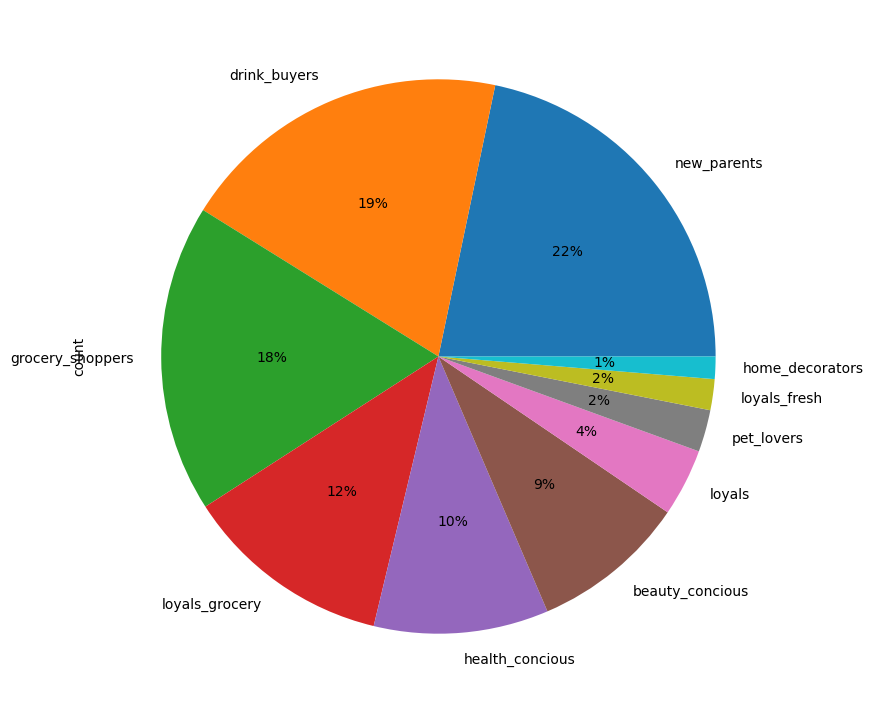

In [278]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

-> Our hypothesised loyal costomers are placed at the top when it comes to number of orders.<br>
-> Our next hypothesis of drink buyers being potential customers is also subtantiated.<br>
-> Pet lovers are very less in number, ulabox should buy less pet products accordingly.<br>
-> When seeing the large discount enjoyed by grocery shoppers in the previous data frame and the less number of grocery shoppers here. They are supposedly customers who brought only on the discount sale.<br>
-> ulabox can actually frame their buying strategies according to these numbers.<br>

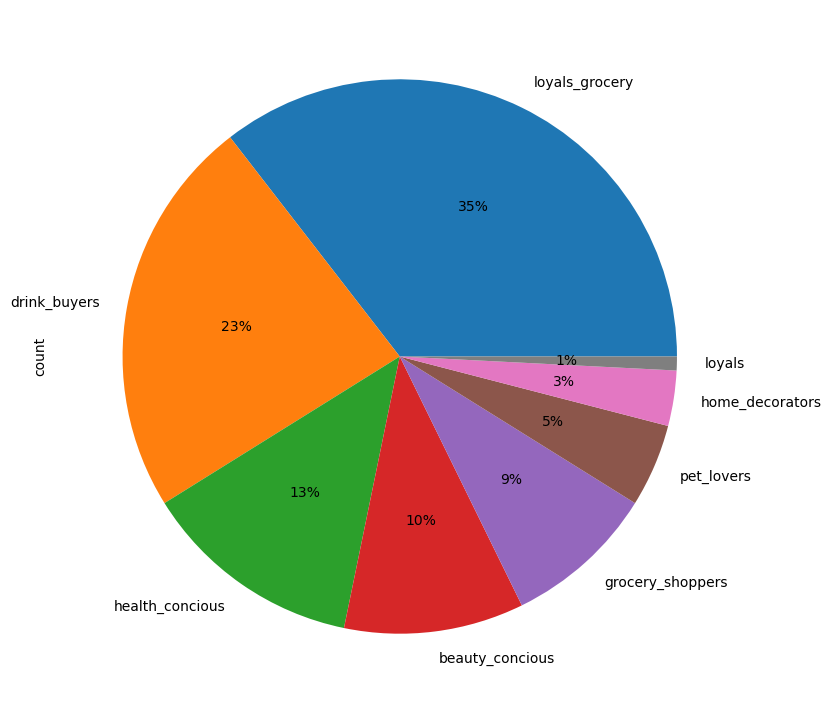

In [281]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [283]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

Unnamed: 0      customer         order  total_items  discount%  \
count     95.000000     95.000000     95.000000    95.000000  95.000000   
mean   14759.526316   4918.821053  14759.526316    20.557895  -8.647684   
std     9367.616510   3130.789949   9367.616510    14.773262  11.753093   
min      768.000000    199.000000    768.000000     6.000000 -65.150000   
25%     6649.500000   2253.000000   6649.500000    11.000000 -10.915000   
50%    15003.000000   5043.000000  15003.000000    14.000000  -5.130000   
75%    23952.000000   7909.000000  23952.000000    25.500000  -1.225000   
max    29592.000000  10043.000000  29592.000000    77.000000  -0.030000   

         weekday       hour      Food%     Fresh%     Drinks%      Home%  \
count  95.000000  95.000000  95.000000  95.000000   95.000000  95.000000   
mean    4.021053  14.010526  12.126947   0.336947   51.752421  15.615368   
std     2.153567   6.022113  14.594043   3.284157   29.978628  18.867919   
min     1.000000   0.000000   0.000000   0.000000    4.470000   0.000000   
25%     2.000000  10.500000   0.000000   0.000000   25.300000   0.000000   
50%     4.000000  14.000000   4.000000   0.000000   49.130000   5.610000   
75%     6.000000  19.000000  21.175000   0.000000   74.845000  28.585000   
max     7.000000  23.000000  48.570000  32.010000  100.000000  74.670000   

         Beauty%    Health%      Baby%      Pets%     labels  
count  95.000000  95.000000  95.000000  95.000000  95.000000  
mean    3.108421   2.288947  12.684105   2.086842   3.852632  
std     6.814804   7.684315  27.110770   9.278154   3.090715  
min     0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000   2.000000  
50%     0.000000   0.000000   0.000000   0.000000   2.000000  
75%     0.615000   0.000000   0.000000   0.000000   7.000000  
max    37.820000  52.570000  86.330000  67.420000   9.000000

-> From the table we can say, even the people in other clusters who had to pay a negative discount have brought a lot drinks.<br>

In [286]:
frame[frame['discount%']<0].shape[0]

124

-> Only 124 among 30k had to pay an extra charge, that's not a pain killer problem.